In [7]:
%load_ext autoreload
%autoreload 2

In [47]:
import sys

import json
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
from scipy import constants as const
import numpy as np

%matplotlib inline

In [48]:
# where WellClass and Ga[ codes are located
sys.path.append('../')

from WellClass.libs.well_pressure.Pressure import Pressure
from WellClass.libs.well_pressure.PressureScenarioManager import PressureScenarioManager
from WellClass.libs.well_pressure.PressureScenario import PressureScenario
from WellClass.libs.well_pressure.helper_func import get_rho_from_pvt_data, load_pvt_data, _integrate_pressure

# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
)

In [50]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

## WINC Examples

### Using predefined fluid curves

It can handle different fluid compositions if PVT tables are available. 
Currently there are 4 options:
- Pure CO2 (100 mol% CO2)
- Pure Methane (100 mol% CH4)
- Gas mixture 1 (96 mol% CO2, 0.4 mol% H2, 1 mol% Ar, 0.82 mol% N2, 1.78 mol% CH4)
- Gas mixture 2 (95 mol% CO2, 5 mol% CH4)


In [51]:
import os
# Retrieve PVT data that is available


directory_path = '../src/WellClass/libs/pvt/pvt_constants'

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    # print(filename)
    file_path = os.path.join(directory_path, filename)
    if os.path.isdir(file_path):
        print(f'{filename}')

water
mixture1
mixture2
pure_co2
methane


In [52]:
field_fluid_type = 'pure_co2'
field_pressure_value = 500
field_depth_value = 3500

In [53]:
my_pressure = Pressure(sf_depth_msl=109,  # wellbore seafloor depth mTVD MSL. 
                       well_td_rkb=6648,  # wellbore td in mTVD RKB
                       well_rkb=62.8,     # wellbore rkb in mTVD RKB
                       sf_temp=4,         # seafloor temperature in degC
                       geo_tgrad=40,      # geothermal gradient in degC/km
                       fluid_type=field_fluid_type,  # fluid type name, should match the filename in the pvt_constants folder
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants', #path to the pvt constants folder
                       z_fluid_contact= field_depth_value, # depth value coming from WINC UI
                       p_fluid_contact= field_pressure_value # pressure value coming from WINC UI
                       ) 

Computing pressure profile for scenario: hydrostatic


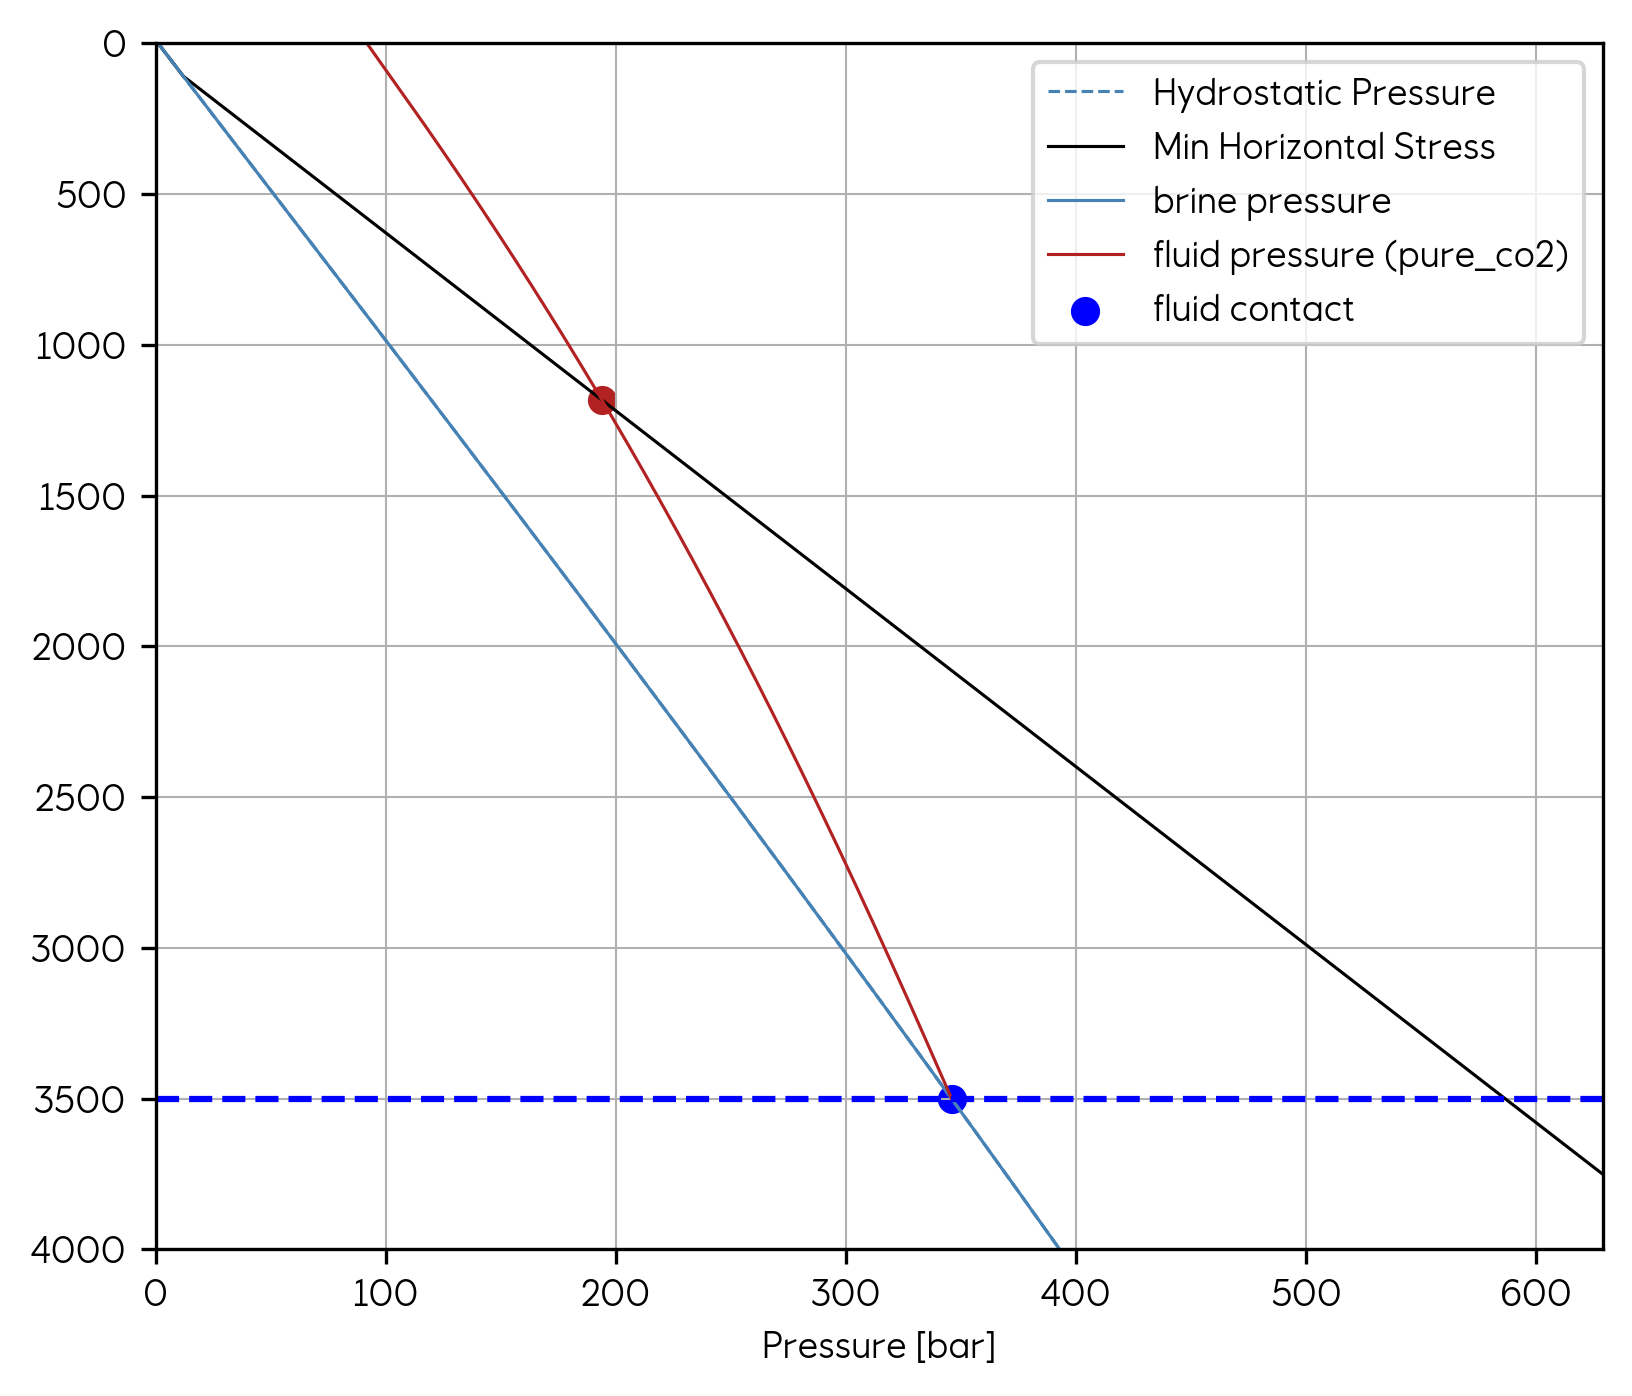

In [54]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

### Using SG

In [55]:
field_fluid_type = 0.1

field_pressure_value = 500
field_depth_value = 3500

In [56]:
my_pressure = Pressure(sf_depth_msl=109,  # wellbore seafloor depth mTVD MSL. 
                       well_td_rkb=6648,  # wellbore td in mTVD RKB
                       well_rkb=62.8,     # wellbore rkb in mTVD RKB
                       sf_temp=4,         # seafloor temperature in degC
                       geo_tgrad=40,      # geothermal gradient in degC/km
                       fluid_type=None, 
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants', #path to the pvt constants folder
                       z_fluid_contact= field_depth_value, # depth value coming from WINC UI
                       p_fluid_contact= field_pressure_value, # pressure value coming from WINC UI
                       specific_gravity=0.05, # specific gravity of the fluid from WINC UI
                       ) 

Computing pressure profile for scenario: hydrostatic


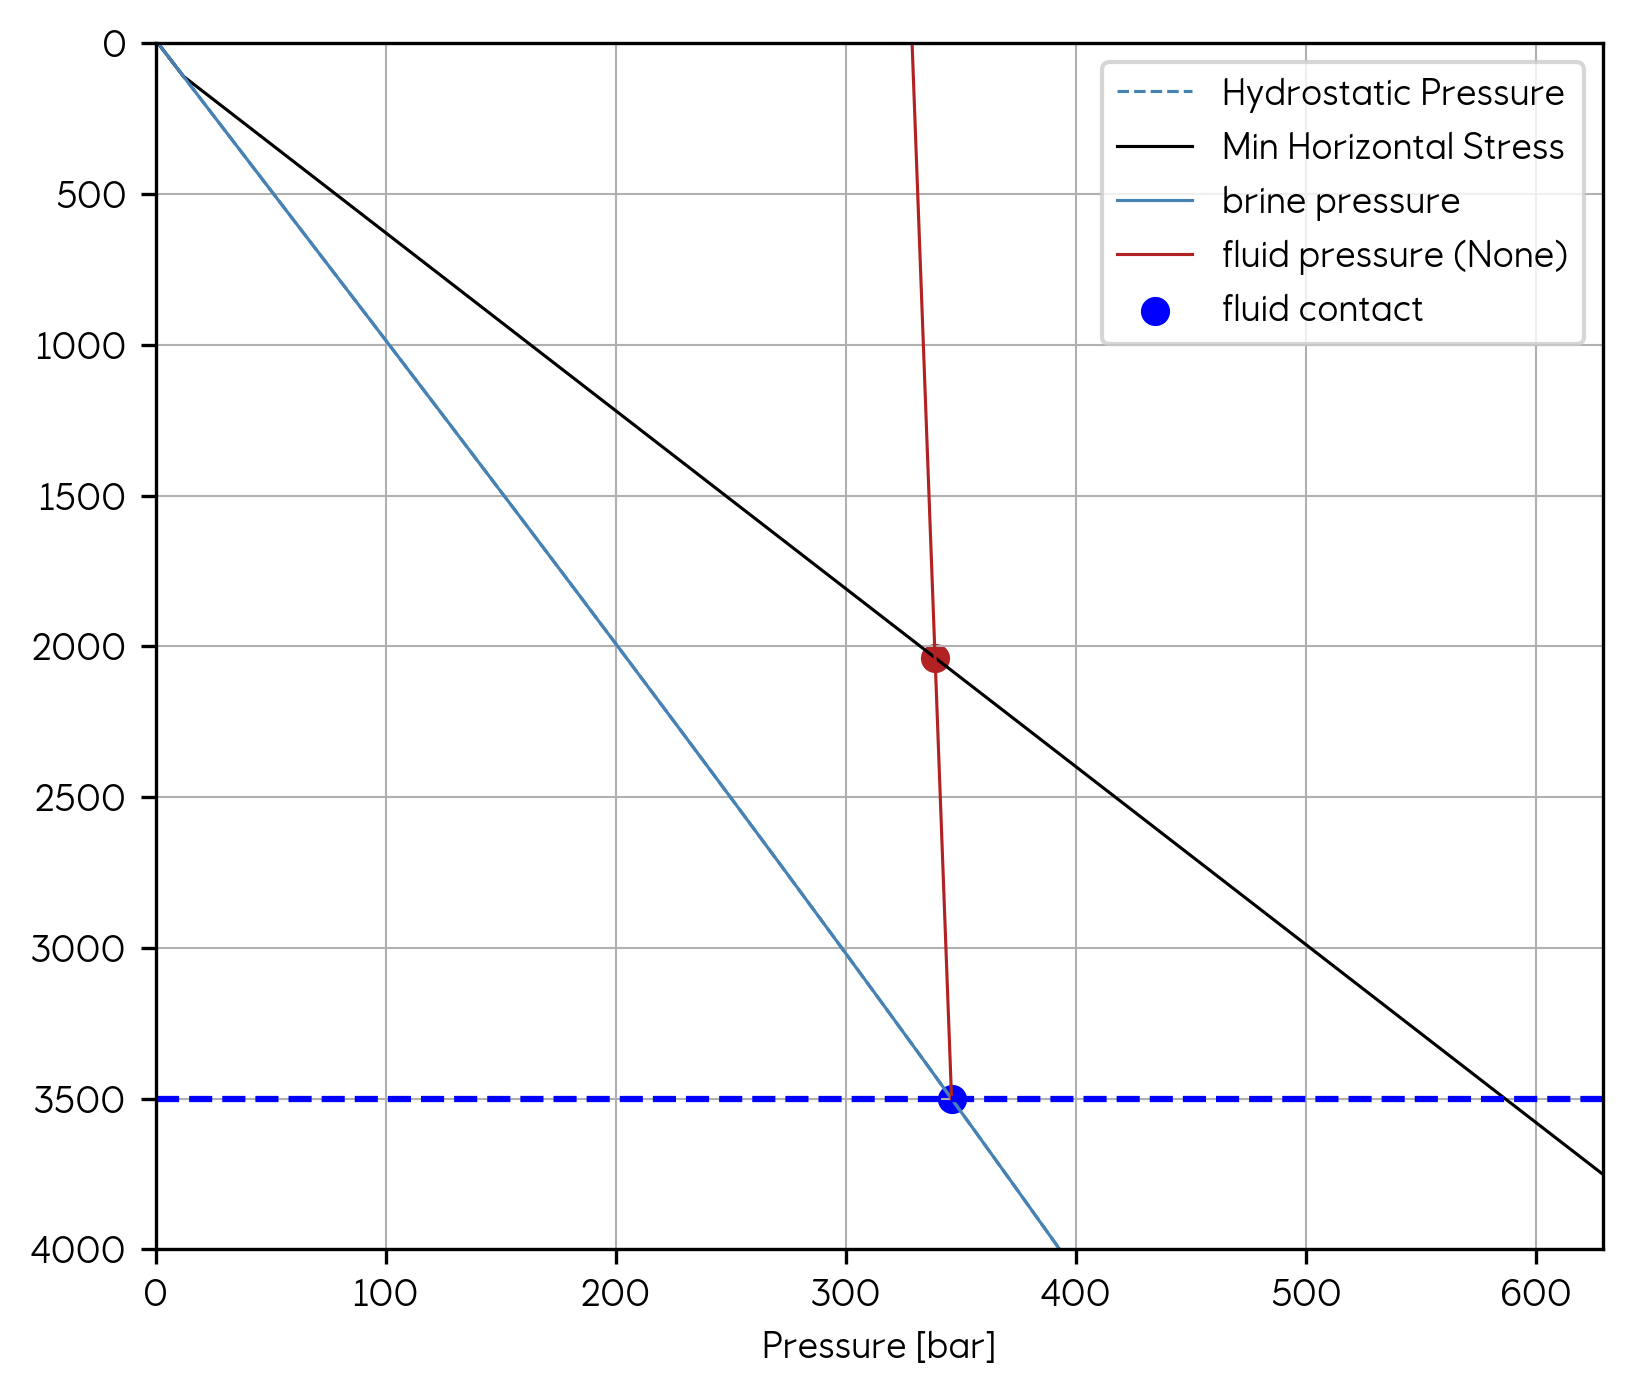

In [57]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

### In Well Builder > Add Data Window

In [65]:
field_fluid_type = 'pure_co2'
field_pressure_value = 500
field_depth_value = 3500

reservoir_pressure_values = [-25, 25, 50]

In [66]:
my_pressure = Pressure(sf_depth_msl=109,  # wellbore seafloor depth mTVD MSL. 
                       well_td_rkb=6648,  # wellbore td in mTVD RKB
                       well_rkb=62.8,     # wellbore rkb in mTVD RKB
                       sf_temp=4,         # seafloor temperature in degC
                       geo_tgrad=40,      # geothermal gradient in degC/km
                       fluid_type=field_fluid_type,  # fluid type name, should match the filename in the pvt_constants folder
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants', #path to the pvt constants folder
                       z_fluid_contact= field_depth_value, # depth value coming from WINC UI
                       p_fluid_contact= field_pressure_value # pressure value coming from WINC UI
                       ) 

Computing pressure profile for scenario: hydrostatic


In [67]:
for idx, dp_value in enumerate(reservoir_pressure_values):

    my_pressure.add_scenario(f'my_sc{1+idx:.0f}', p_delta=dp_value, z_fluid_contact= my_pressure.z_fluid_contact,   from_resrvr = True)

Computing pressure profile for scenario: my_sc1
Lines do not intersect
Computing pressure profile for scenario: my_sc2
Computing pressure profile for scenario: my_sc3


In [68]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD  z_resrv     p_resrv  \
0  hydrostatic         True  1183.111036  194.043135     3500  346.045449   
1       my_sc1         True   986.871256  160.780492     3500  321.045449   
2       my_sc2         True  1392.038954  229.456417     3500  371.045449   
3       my_sc3         True  1611.664408  266.682932     3500  396.045449   

   z_fluid_contact  p_fluid_contact  p_delta fluid_type fluid_composition  \
0             3500       346.045449        0   pure_co2          100% CO2   
1             3500       321.045449      -25   pure_co2          100% CO2   
2             3500       371.045449       25   pure_co2          100% CO2   
3             3500       396.045449       50   pure_co2          100% CO2   

  specific_gravity  
0             None  
1             None  
2             None  
3             None

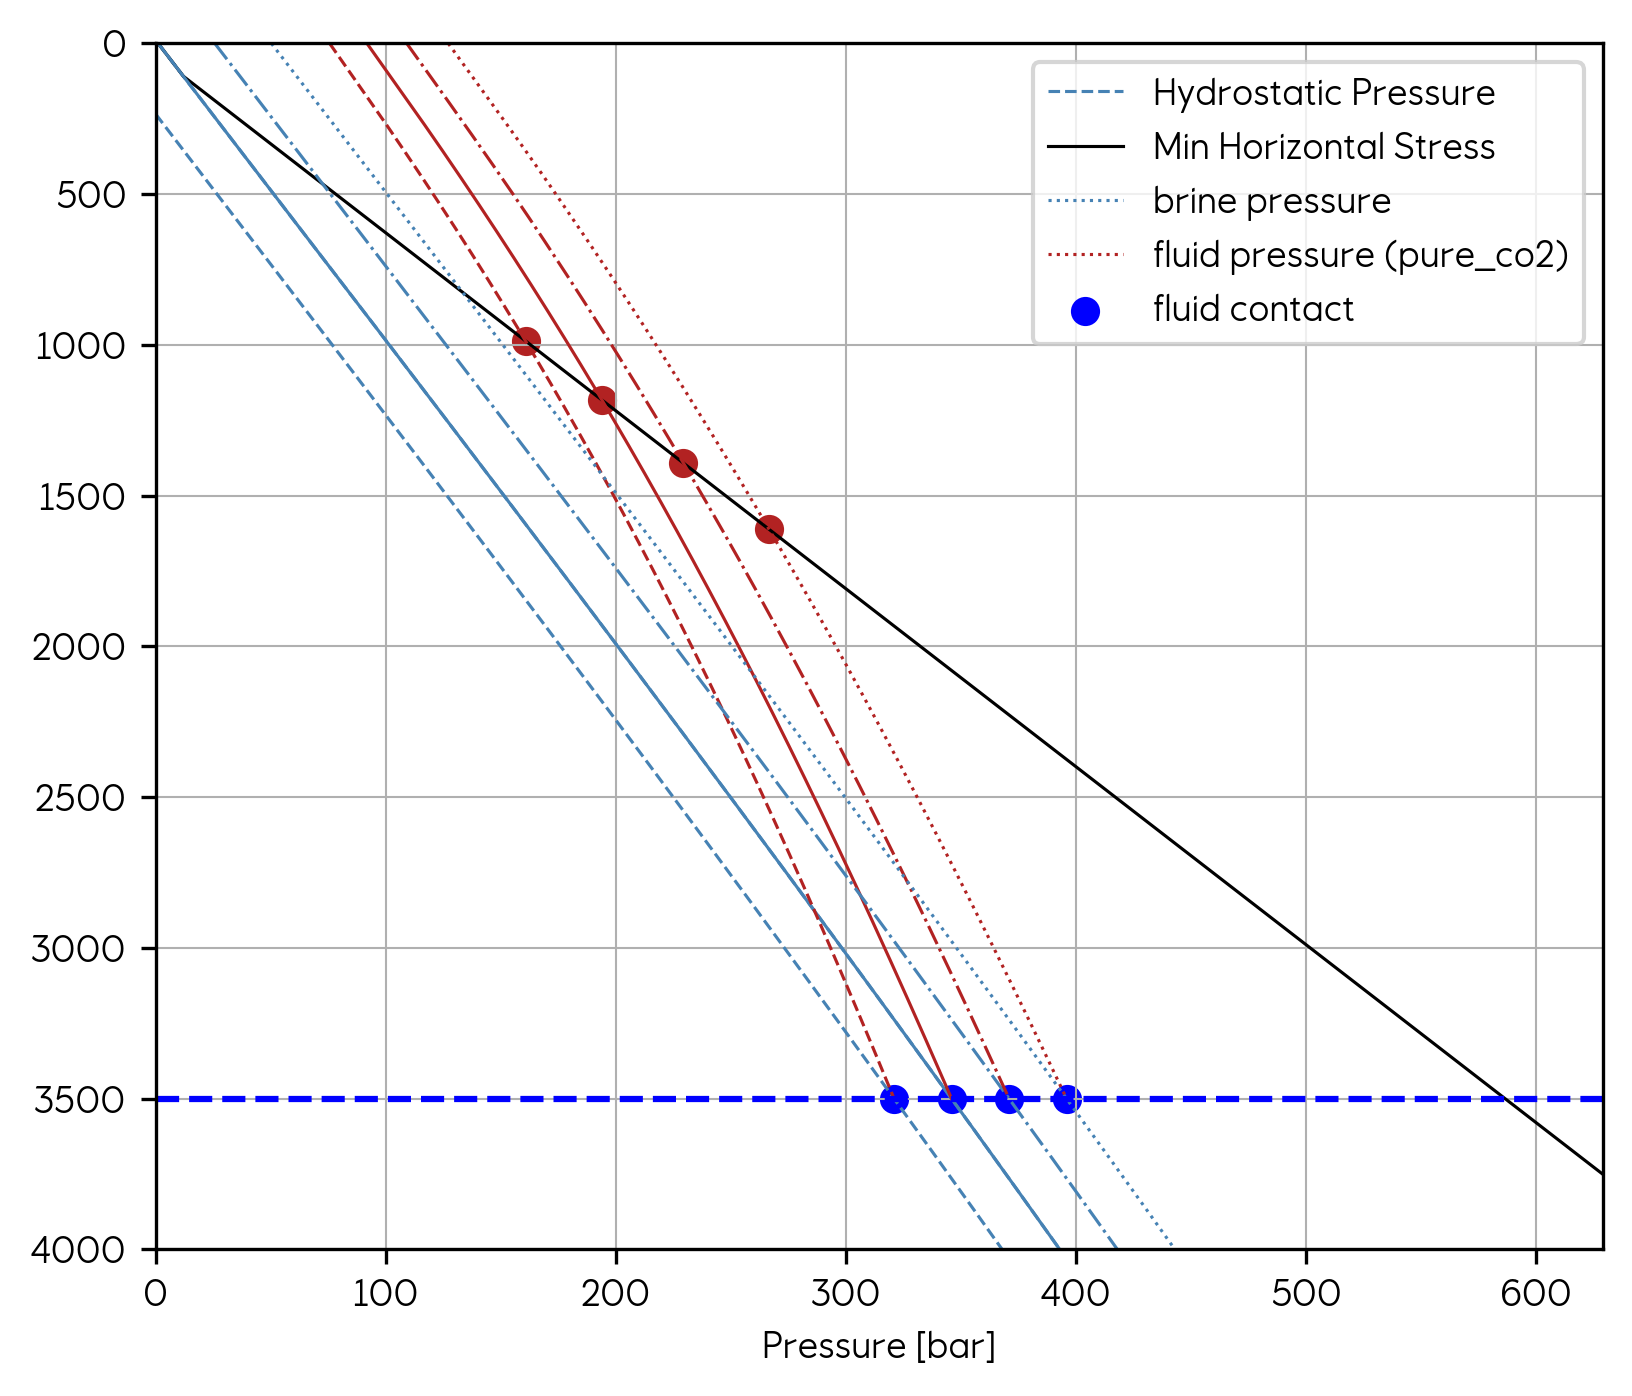

In [69]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

## Retrieving data for plotting

1. Retrieving control points

In [39]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr      z_MSAD      p_MSAD  z_resrv     p_resrv  \
0  hydrostatic         True  585.146752  139.139674     3500  337.748983   
1       my_sc1         True  494.094258  114.774465     3500  312.748983   
2       my_sc2         True  683.083370  165.342024     3500  362.748983   
3       my_sc3         True  786.173464  192.916221     3500  387.748983   

   z_fluid_contact  p_fluid_contact  p_delta fluid_type fluid_composition  \
0             3500       337.748983        0   pure_co2          100% CO2   
1             3500       312.748983      -25   pure_co2          100% CO2   
2             3500       362.748983       25   pure_co2          100% CO2   
3             3500       387.748983       50   pure_co2          100% CO2   

  specific_gravity  
0             None  
1             None  
2             None  
3             None

2. Retrieving curves for my_sc2

In [42]:
sc_name = 'my_sc2'

my_pressure.scenario_manager.scenarios[sc_name].init_curves

depth  temperature  hydrostatic_pressure  min_horizontal_stress  \
0        0.0         4.00              1.013250               1.013250   
1        1.0         4.00              1.111314               1.111314   
2        2.0         4.00              1.209379               1.209379   
3        3.0         4.00              1.307444               1.307444   
4        4.0         4.00              1.405510               1.405510   
...      ...          ...                   ...                    ...   
7080  7080.0       282.84            644.989156            1826.573656   
7081  7081.0       282.88            645.066649            1826.820649   
7082  7082.0       282.92            645.144137            1827.067637   
7083  7083.0       282.96            645.221619            1827.314619   
7084  7084.0       283.00            645.299095            1827.561595   

      fluid_pressure  brine_pressure  
0                NaN             NaN  
1                NaN             NaN  
2                NaN             NaN  
3                NaN             NaN  
4                NaN             NaN  
...              ...             ...  
7080             NaN      670.118128  
7081             NaN      670.195621  
7082             NaN      670.273109  
7083             NaN      670.350590  
7084             NaN      670.428066  

[7085 rows x 6 columns]

## Example 1: Minimum input (only fluid contact)

In [49]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3500.)

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: hydrostatic


In [50]:
my_pressure.manage_scenarios()

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: hydrostatic


In [51]:
my_pressure.add_scenario('methane', fluid_type='methane', from_resrvr=True, z_fluid_contact=my_pressure.z_fluid_contact)

fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: methane


hydrostatic
methane


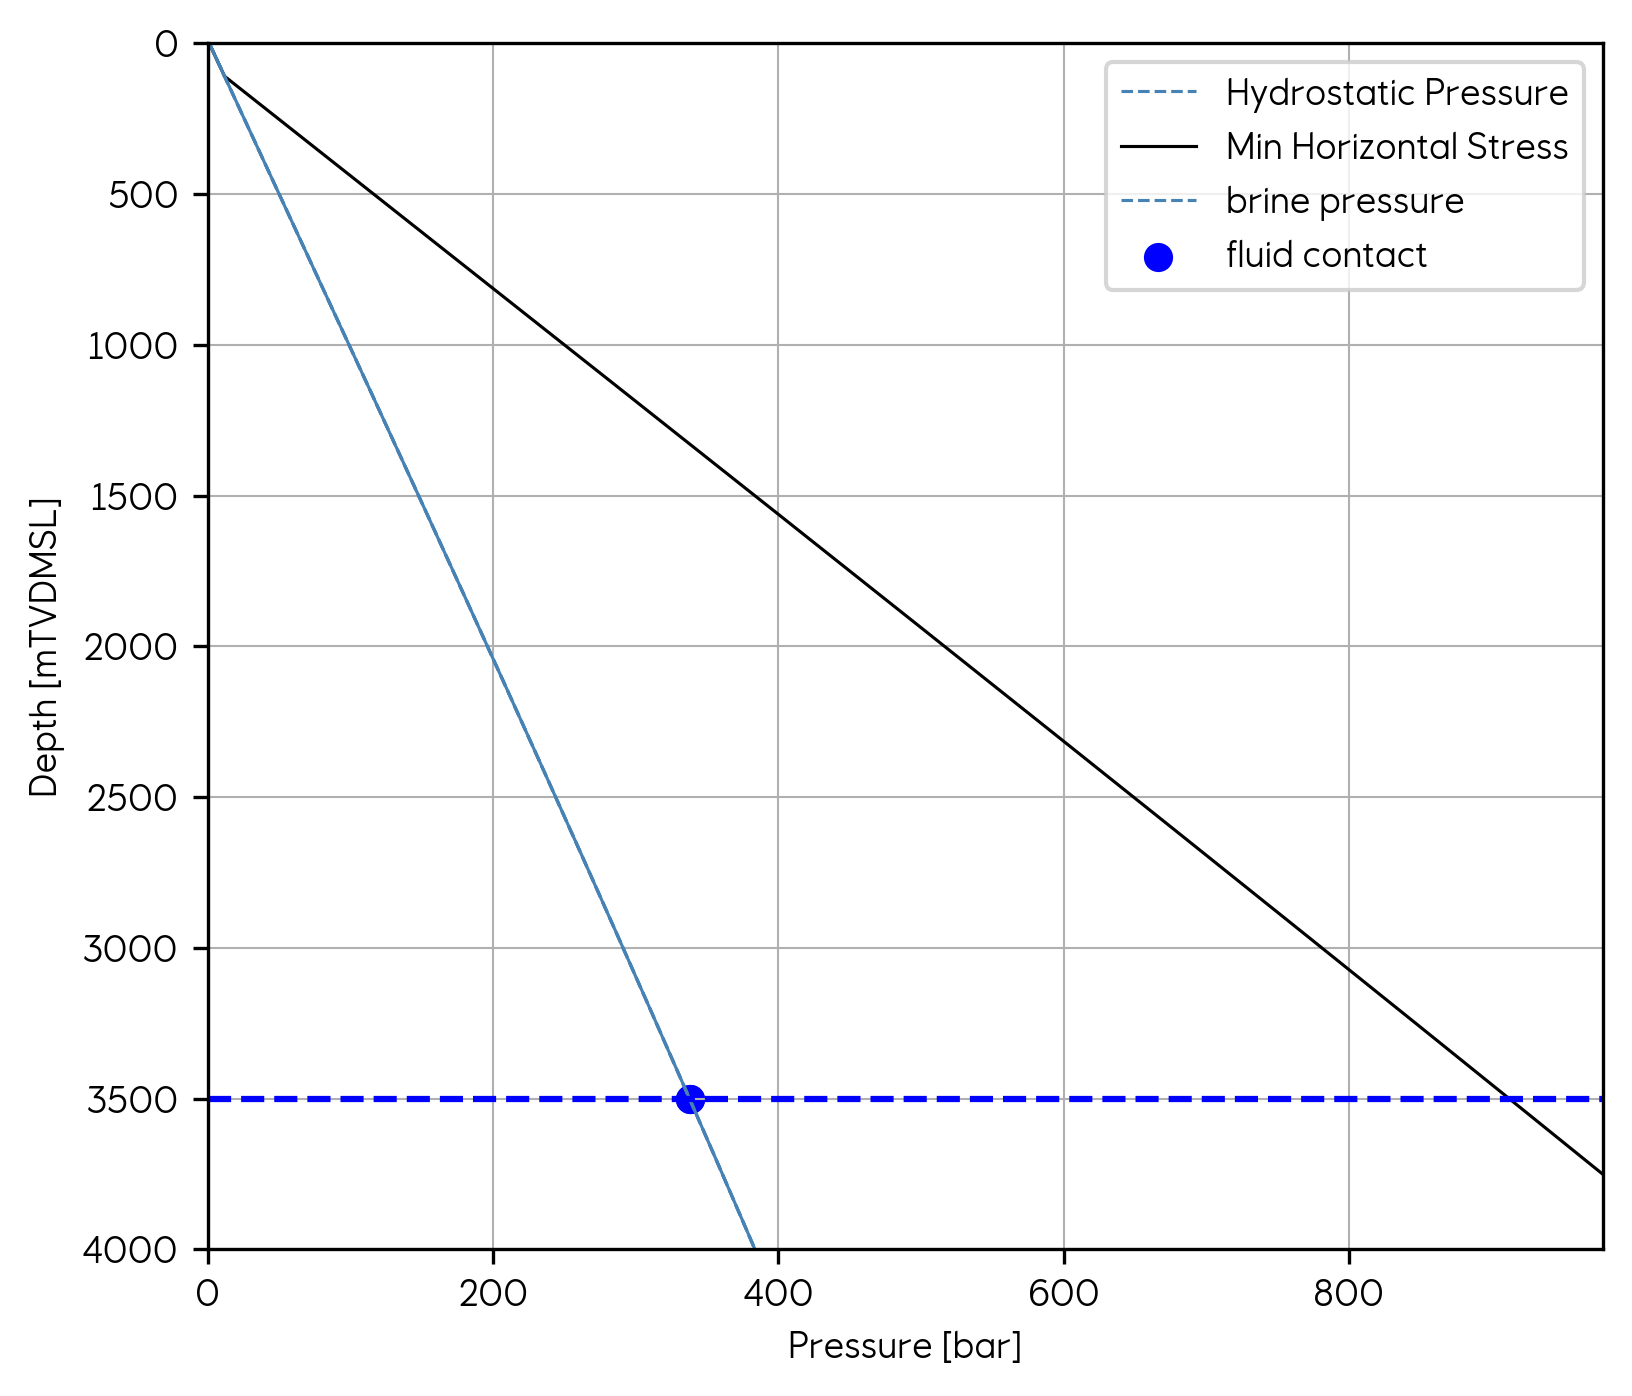

In [52]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

In [53]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD  z_resrv     p_resrv  \
0  hydrostatic         True   585.146752  139.139674   3500.0  337.748983   
1      methane         True  1175.327879  296.917290   3500.0  337.748983   

   z_fluid_contact  p_fluid_contact  p_delta fluid_type fluid_composition  \
0           3500.0       337.748983        0   pure_co2          100% CO2   
1           3500.0       337.748983        0    methane          100% CH4   

  specific_gravity  
0             None  
1             None

hydrostatic
methane


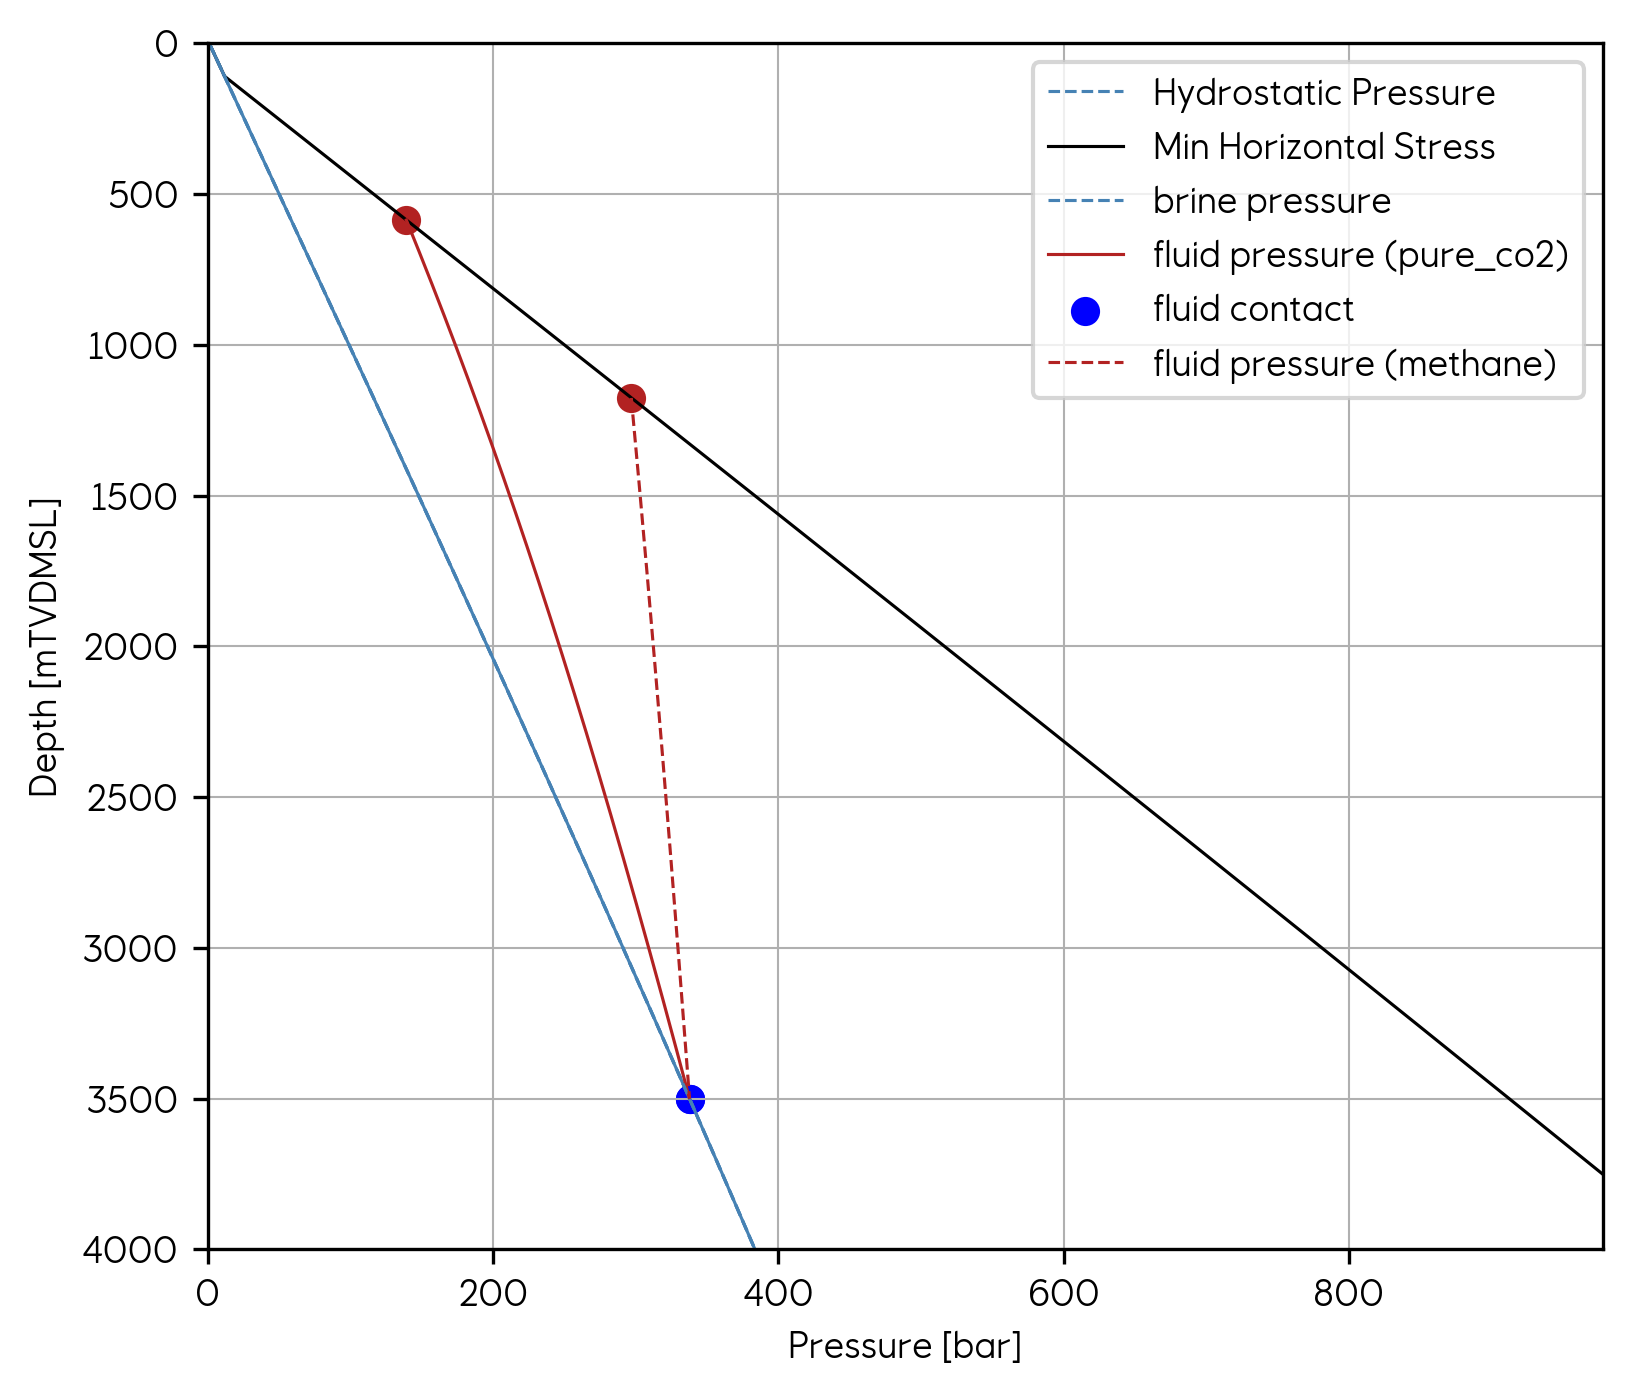

In [54]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)

fig.tight_layout()


## Example 2: Fluid contact + Delta P

In [55]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3700.)

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: hydrostatic


In [56]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_fluid_contact=3500, p_delta=50)

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: pure_co2


In [57]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr      z_MSAD      p_MSAD  z_resrv     p_resrv  \
0  hydrostatic         True  612.746874  146.524496   3700.0  356.196879   
1     pure_co2         True  786.173464  192.916221   3500.0  387.748983   

   z_fluid_contact  p_fluid_contact  p_delta fluid_type fluid_composition  \
0           3700.0       356.196879        0   pure_co2          100% CO2   
1           3500.0       387.748983       50   pure_co2          100% CO2   

  specific_gravity  
0             None  
1             None

pure_co2


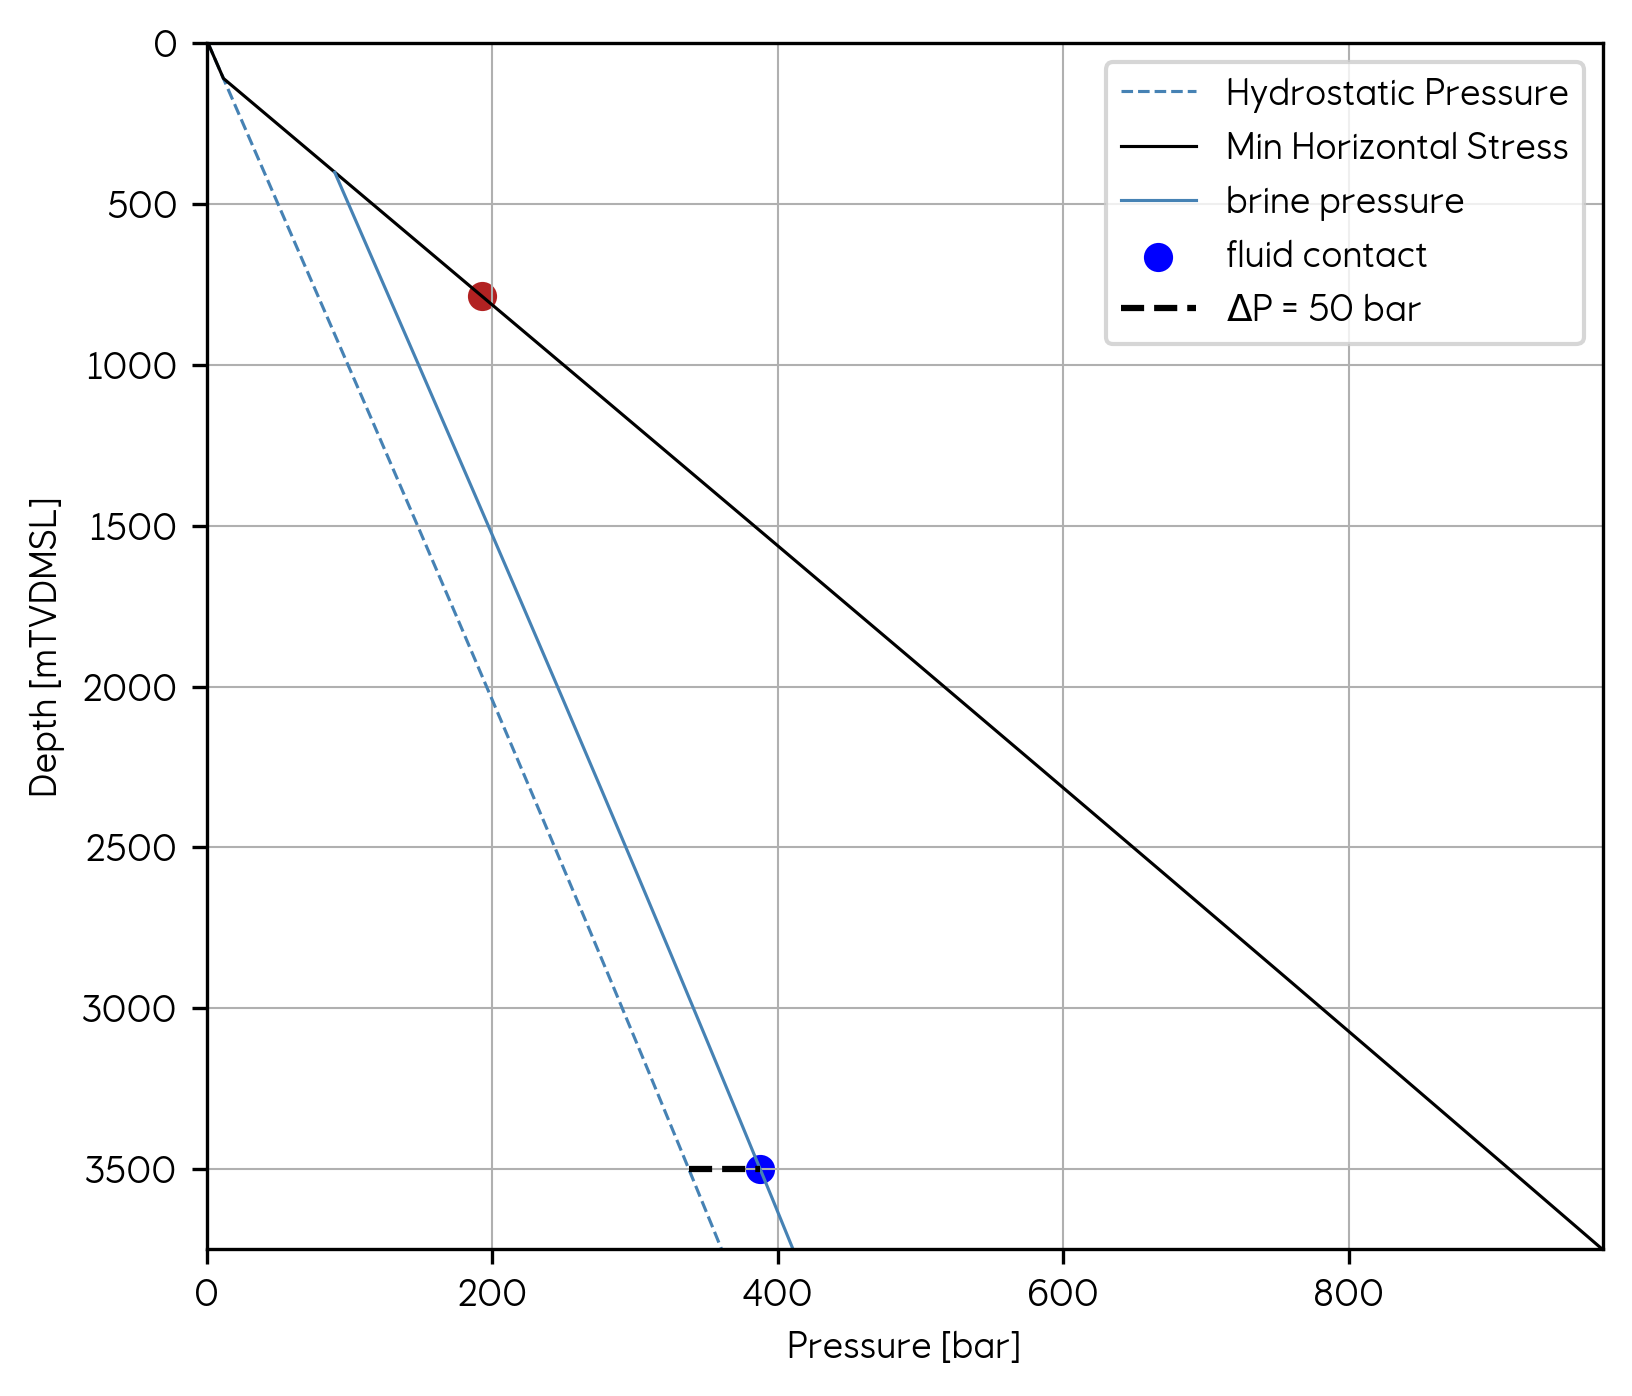

In [58]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,
              plot_selected_scenarios=['pure_co2'])



fig.tight_layout()


## Example 3: Reservoir Pressure

In [59]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [60]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_resrv=3400, p_resrv=380)  

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: pure_co2
self.z_fluid_contact=None


pure_co2


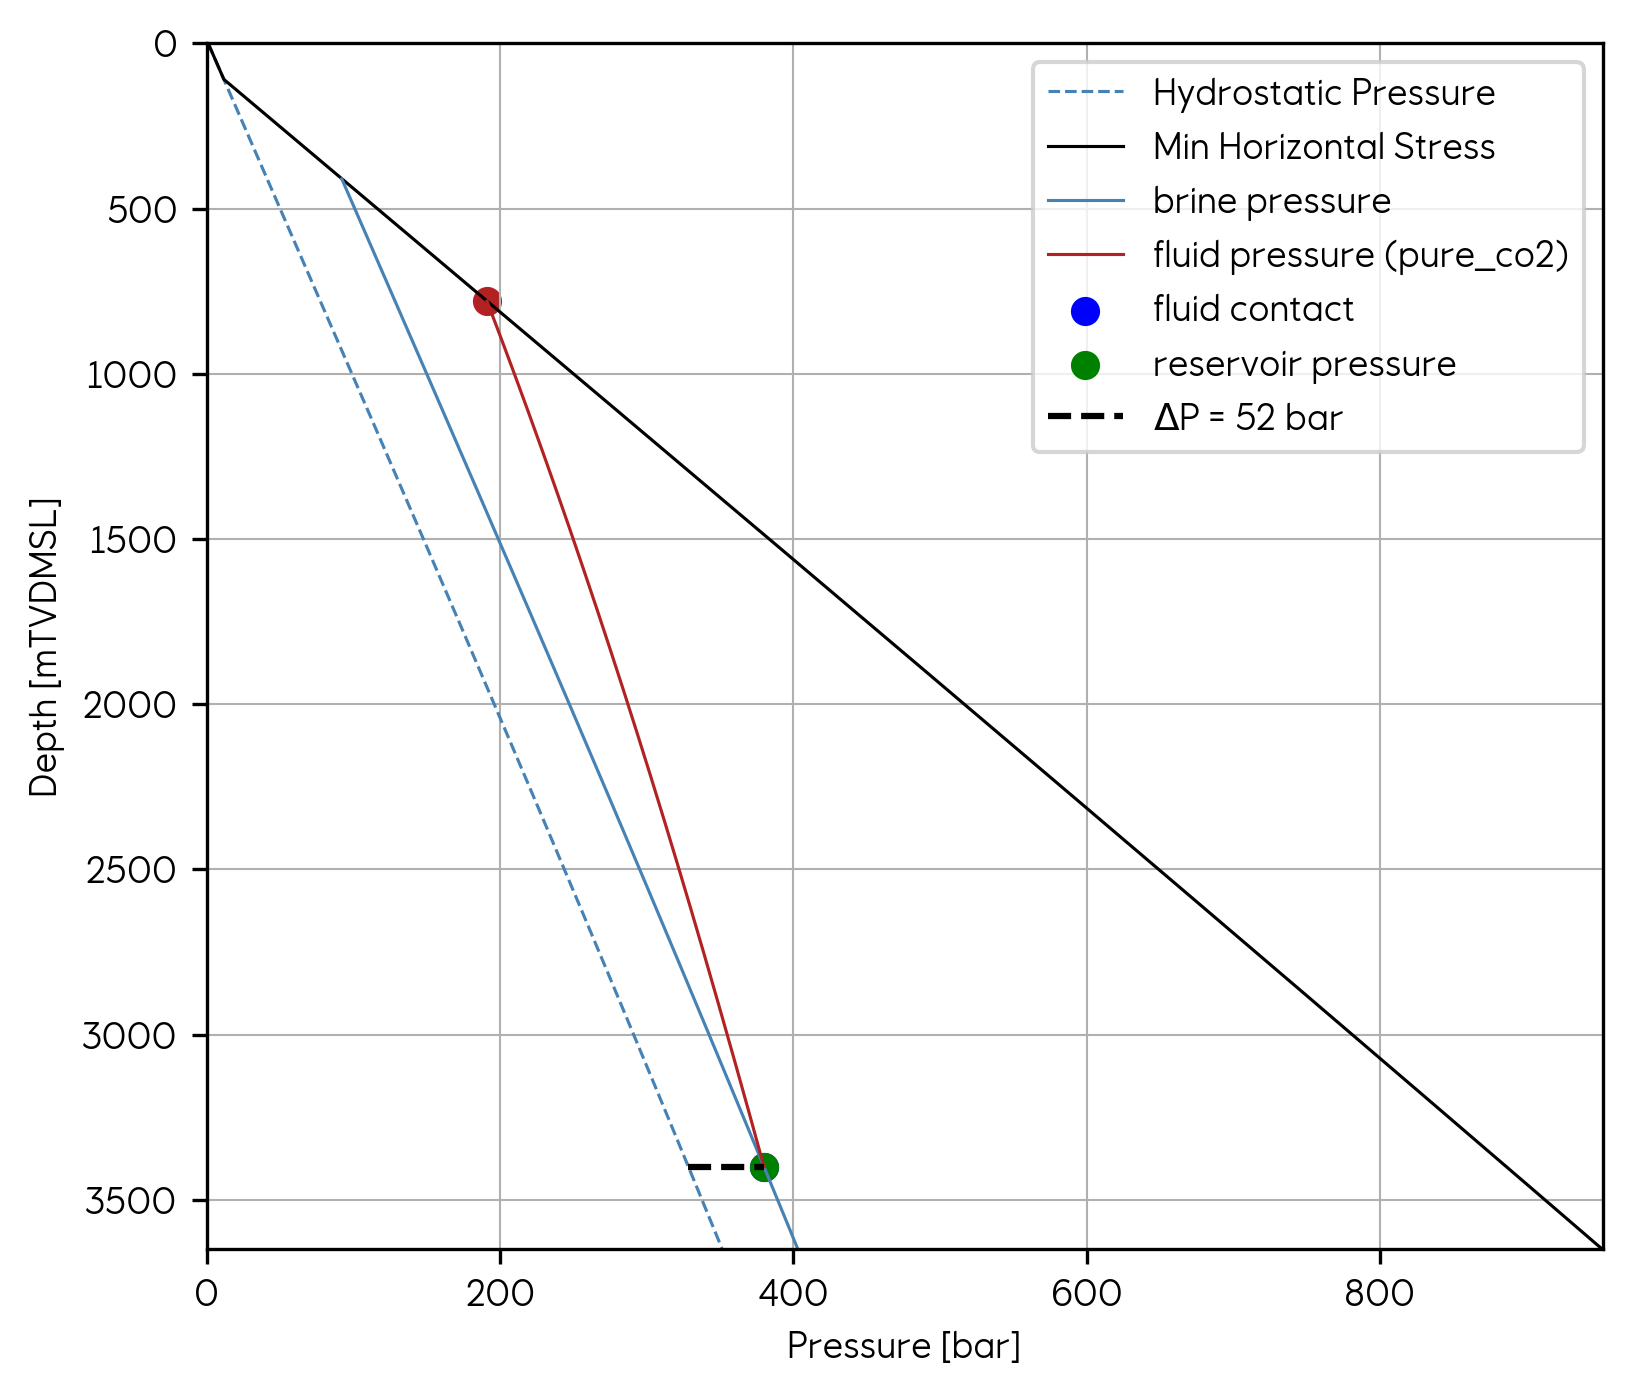

In [61]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)


fig.tight_layout()


## Example 4: Reservoir Pressure + fluid contact


In [62]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [63]:
my_pressure.add_scenario('C1', fluid_type='methane', from_resrvr=True, z_resrv=3100, p_resrv=320, z_fluid_contact=3700)  

fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: C1
self.z_fluid_contact=3700
Lines do not intersect


C1


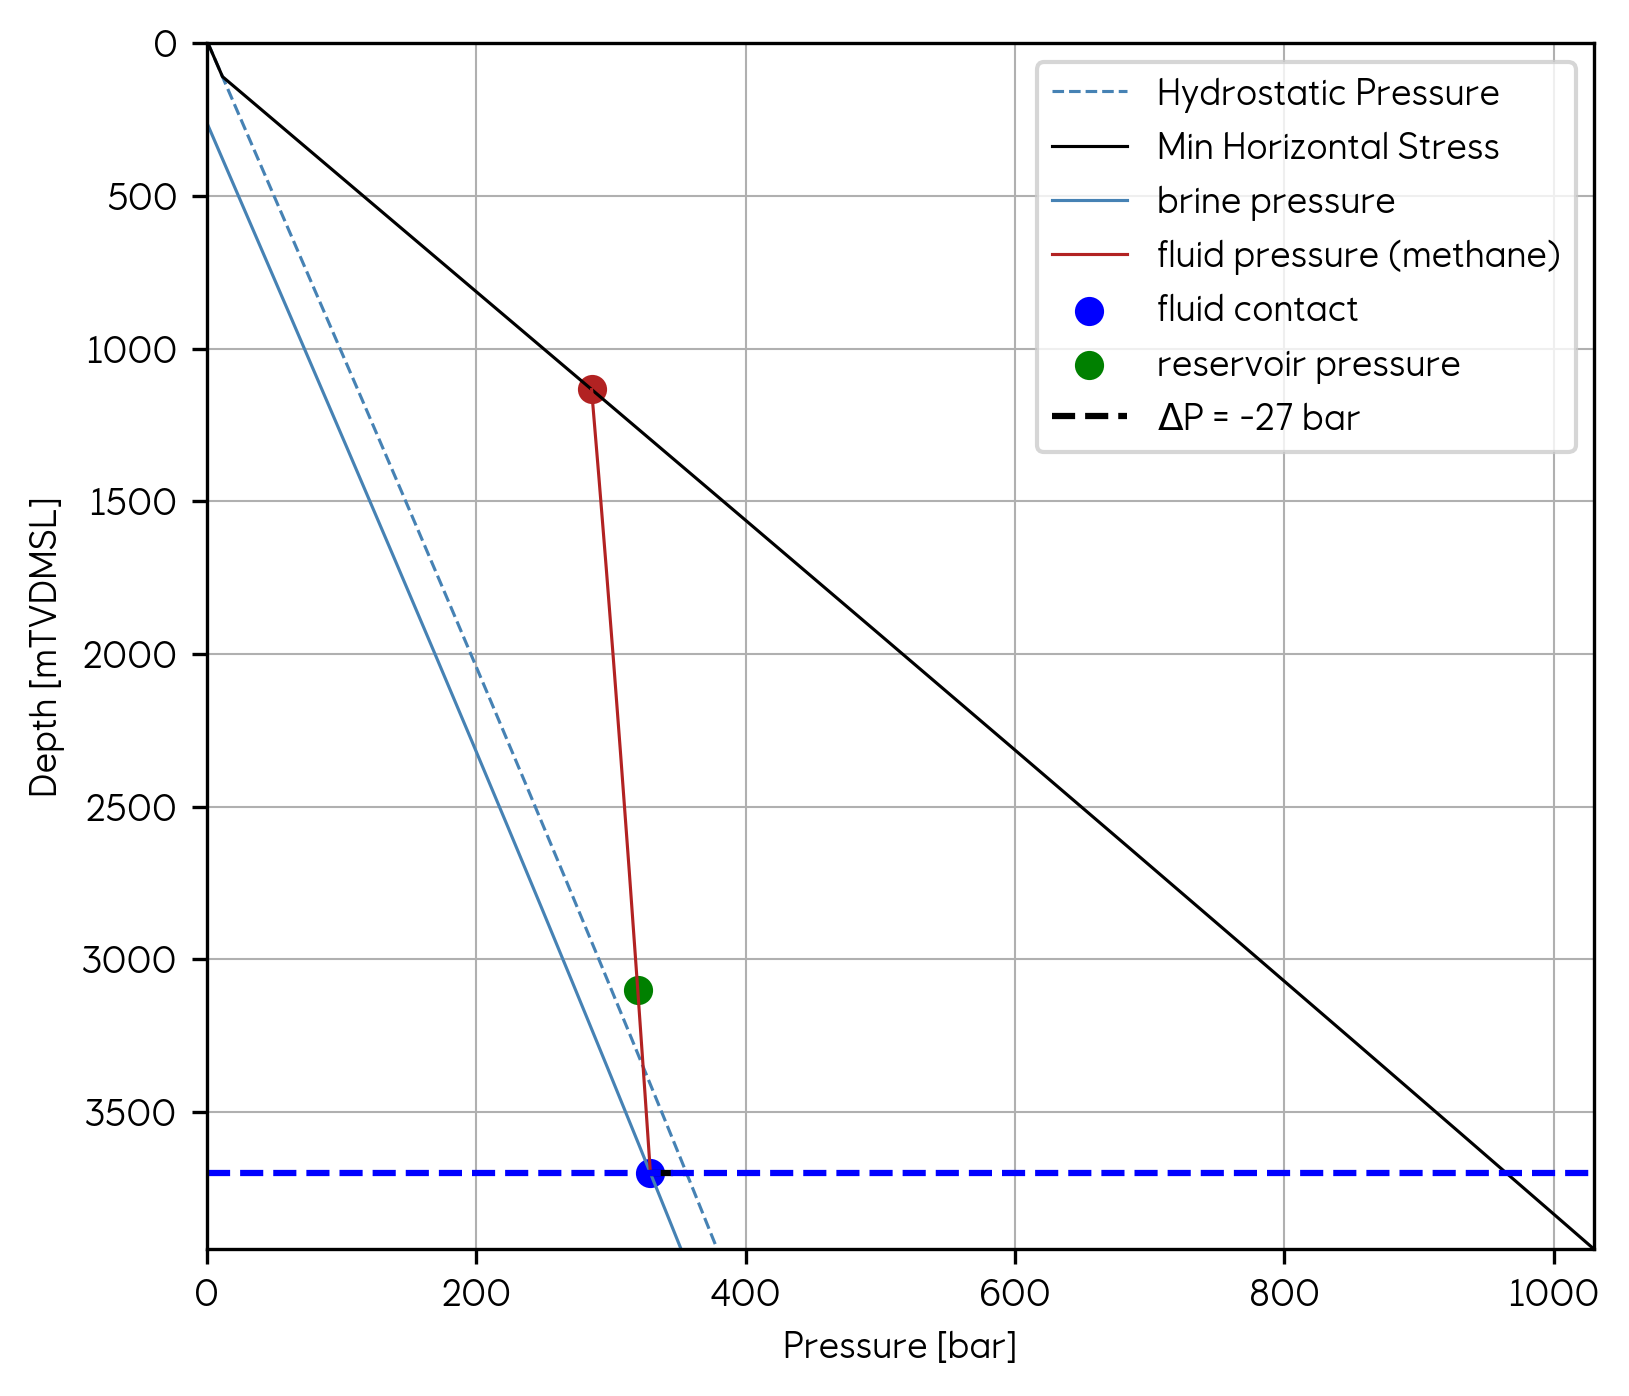

In [64]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 5: Multiple reservoirs


In [65]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [66]:
my_pressure.add_scenario('top r', fluid_type='methane', from_resrvr=True, z_resrv=3000, p_resrv=310, z_fluid_contact=3200)  
my_pressure.add_scenario('bottom r', fluid_type='methane', from_resrvr=True, z_fluid_contact=3700, p_delta=50)  

fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: top r
self.z_fluid_contact=3200
fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: bottom r


top r
bottom r


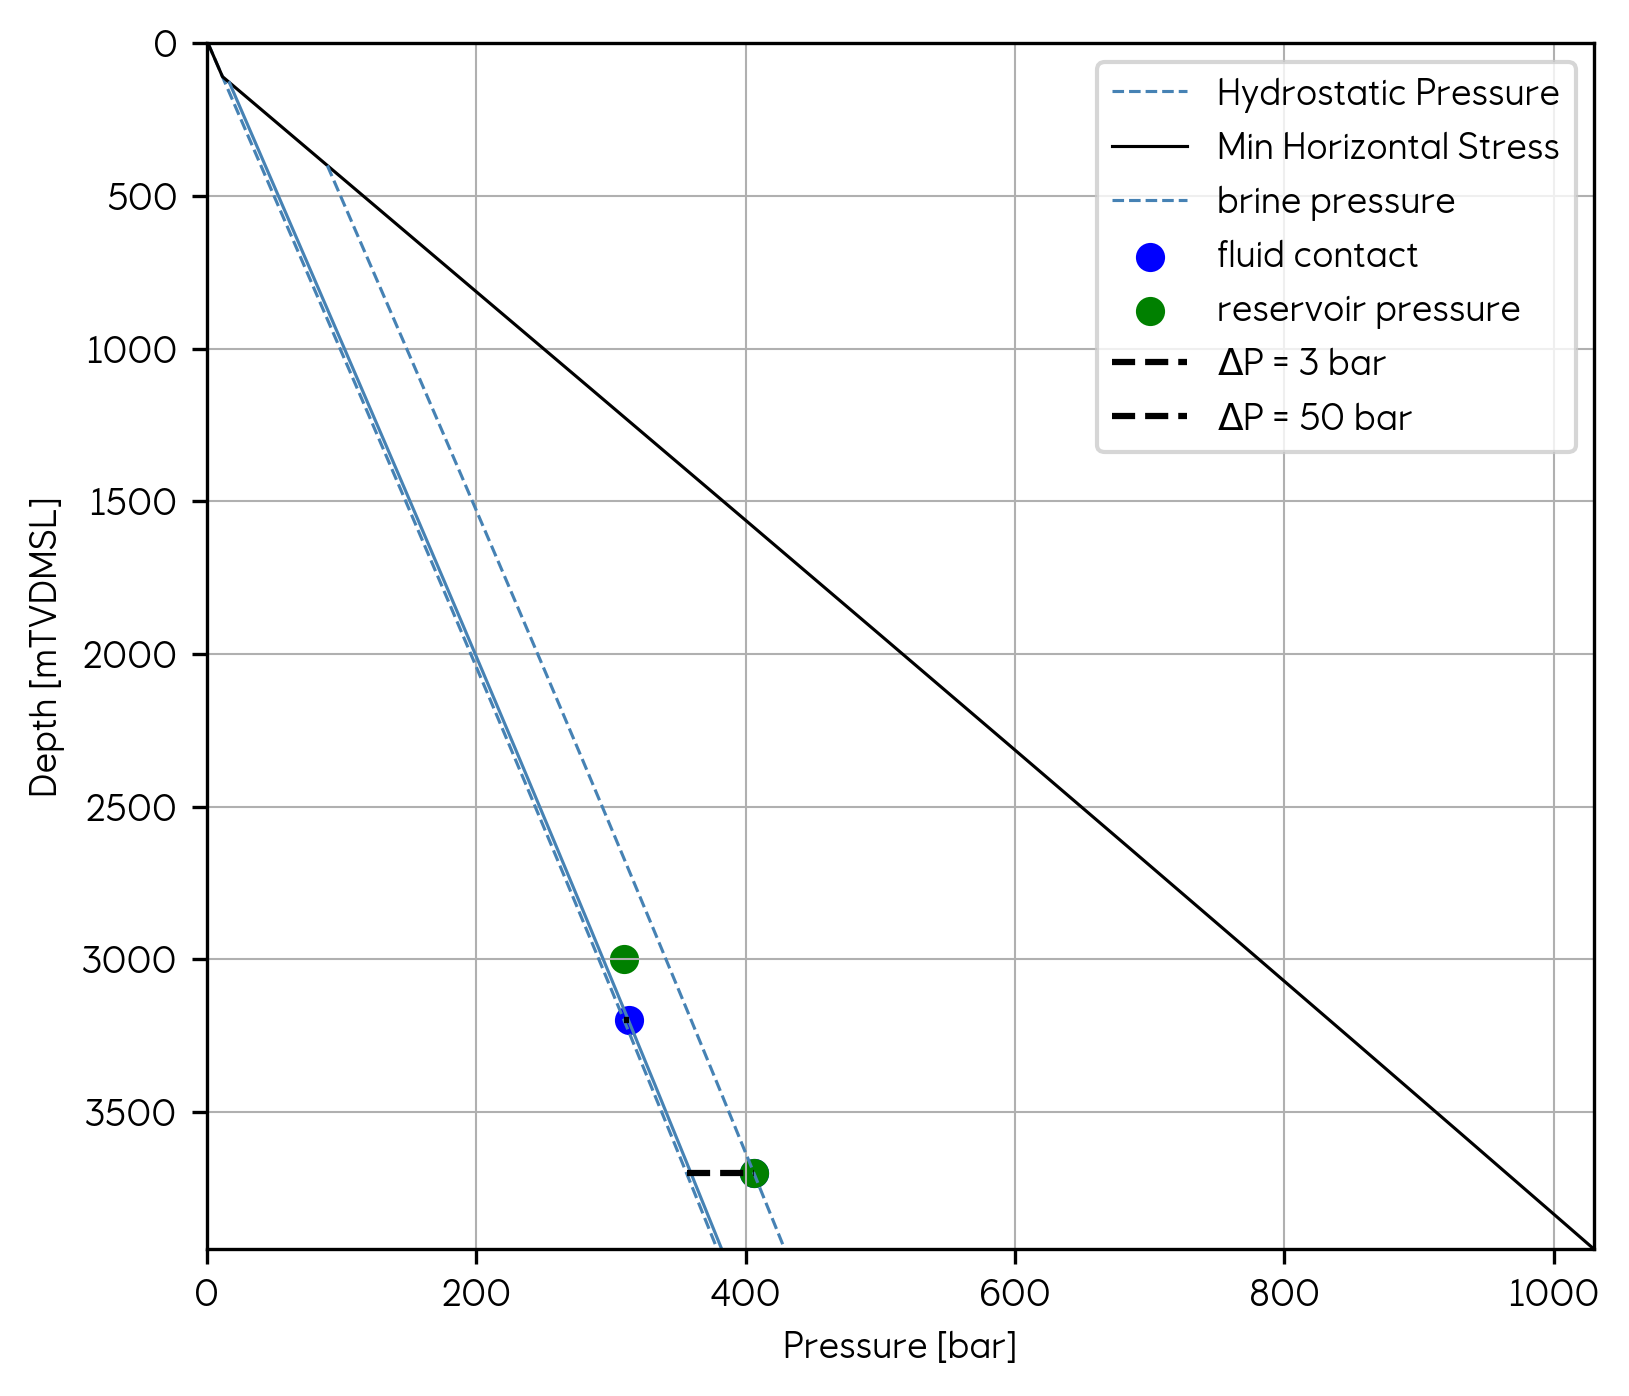

In [67]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,)


fig.tight_layout()


top r
bottom r


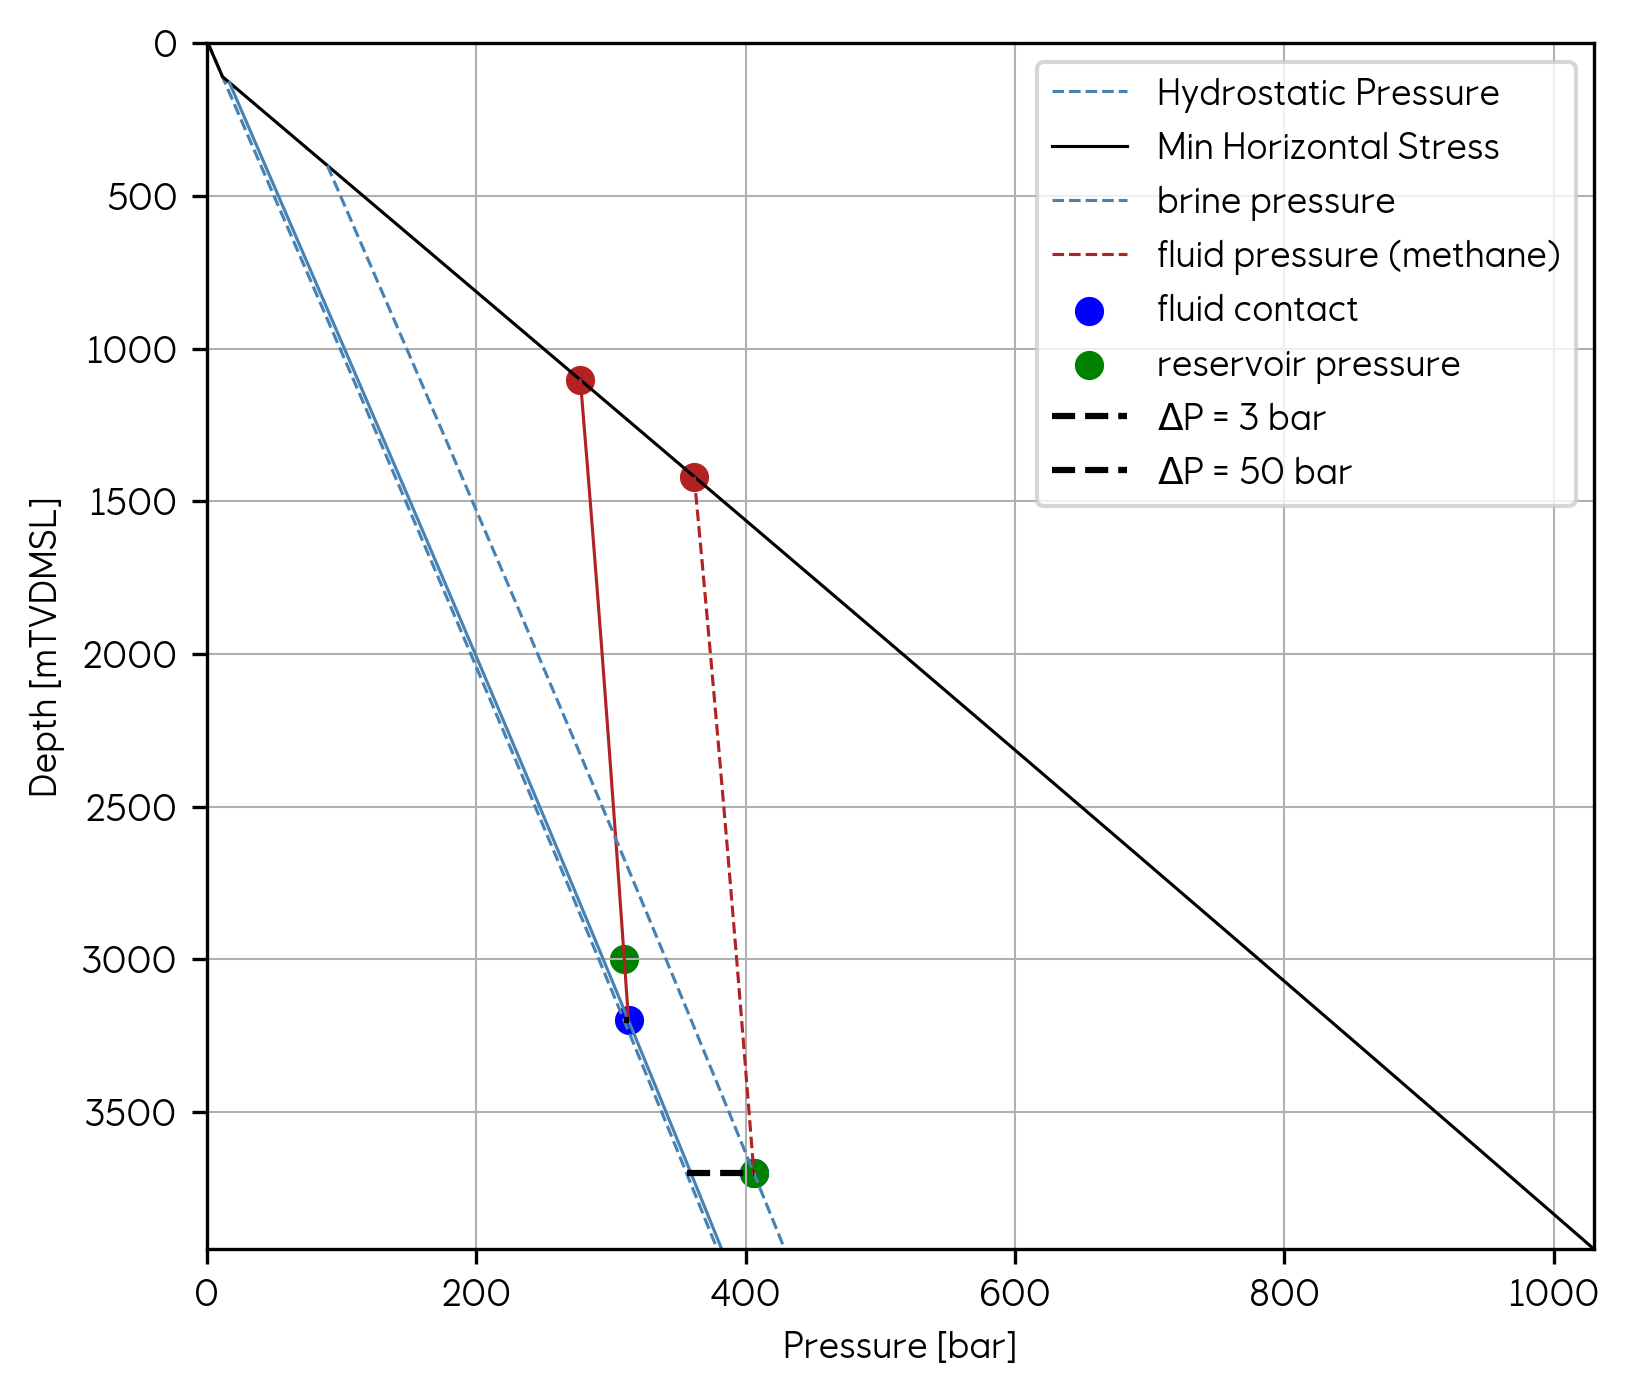

In [68]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 6: Compute pressure profile downwards from MSAD


In [69]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [70]:
my_pressure.add_scenario('Plug1', fluid_type='methane', from_resrvr=False,  z_MSAD=1800, z_fluid_contact=4000)    
my_pressure.add_scenario('Plug2', fluid_type='methane', from_resrvr=False,  z_MSAD=2500, z_fluid_contact=4000)  


fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: Plug1
fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: Plug2


Plug1
Plug2


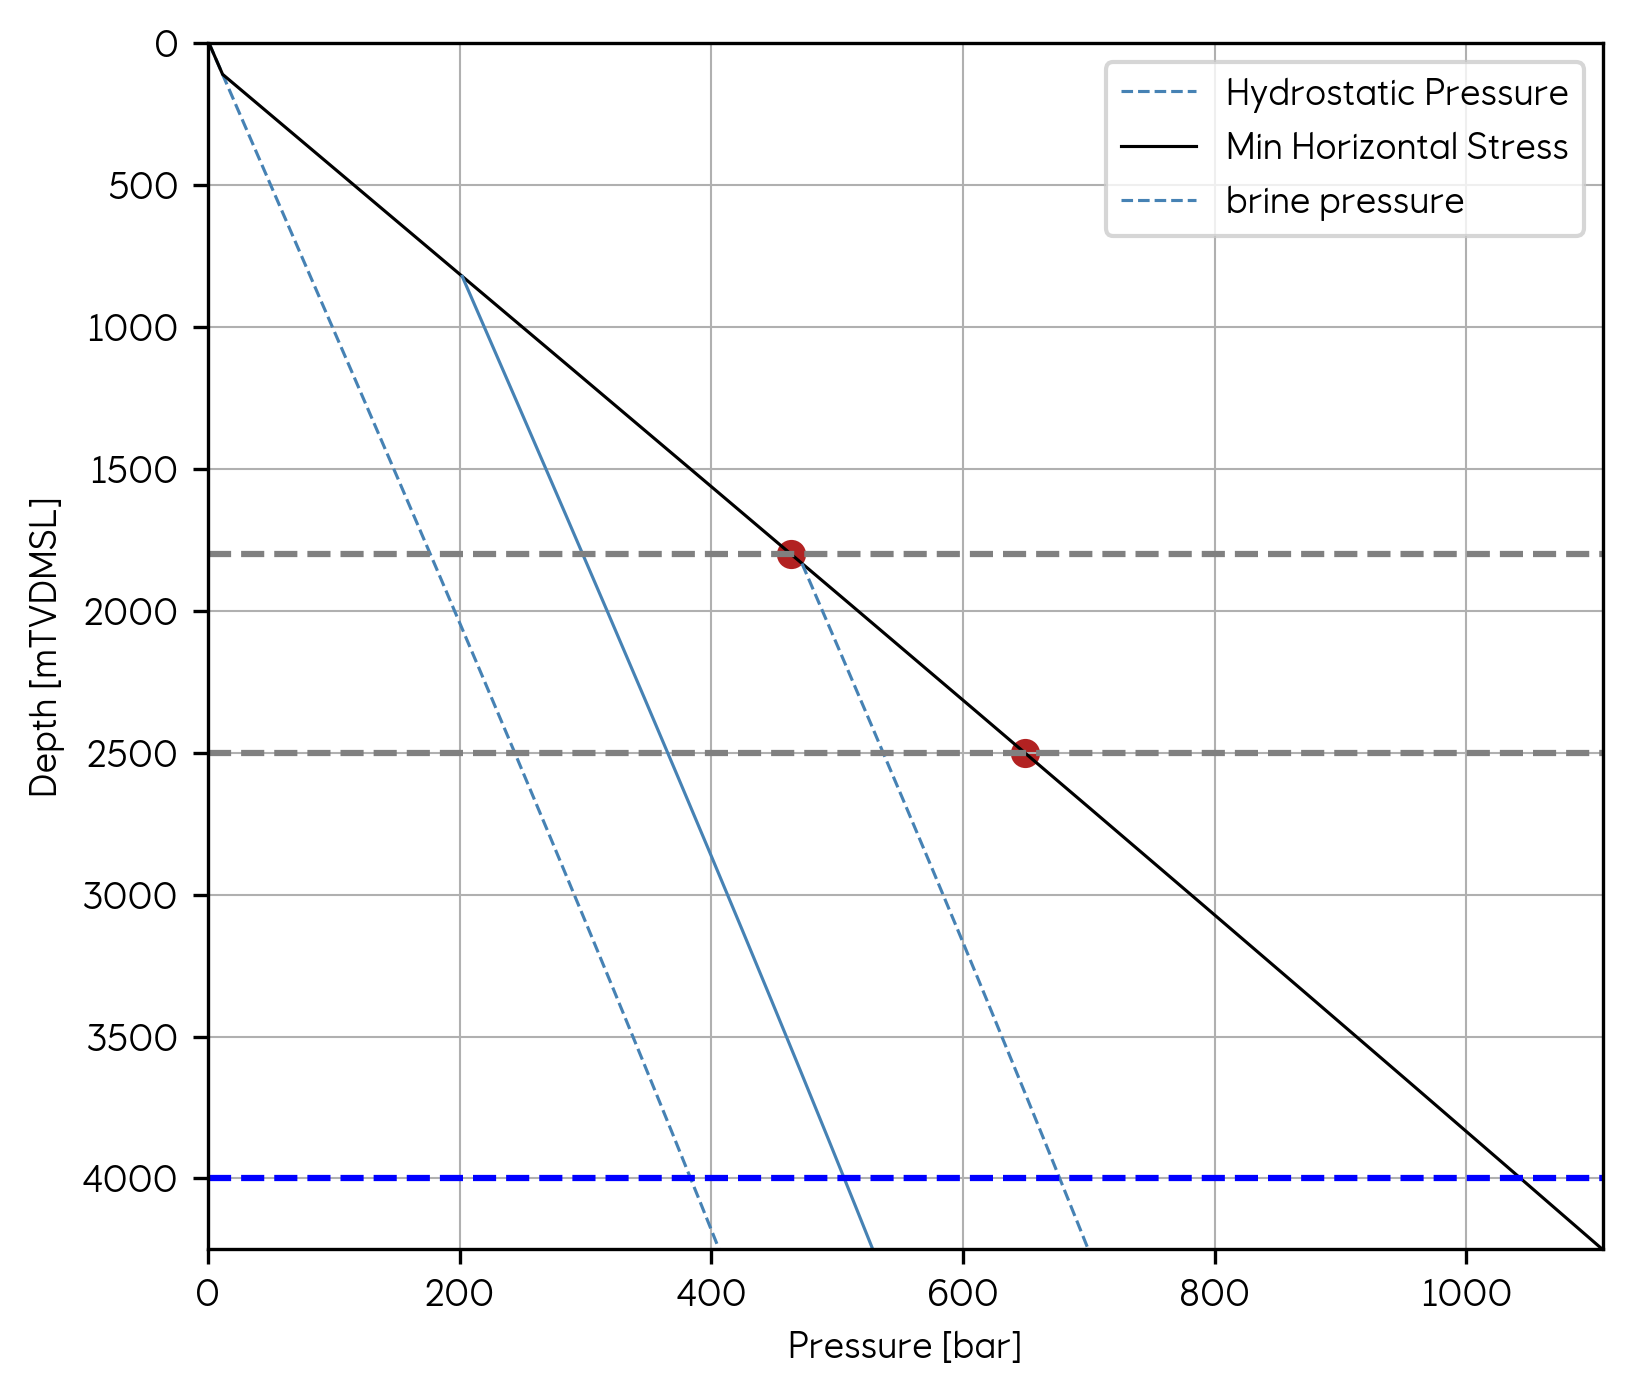

In [71]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=False, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False,)

ax.axhline(y=1800, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=2500, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=4000, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


Plug1
Plug2


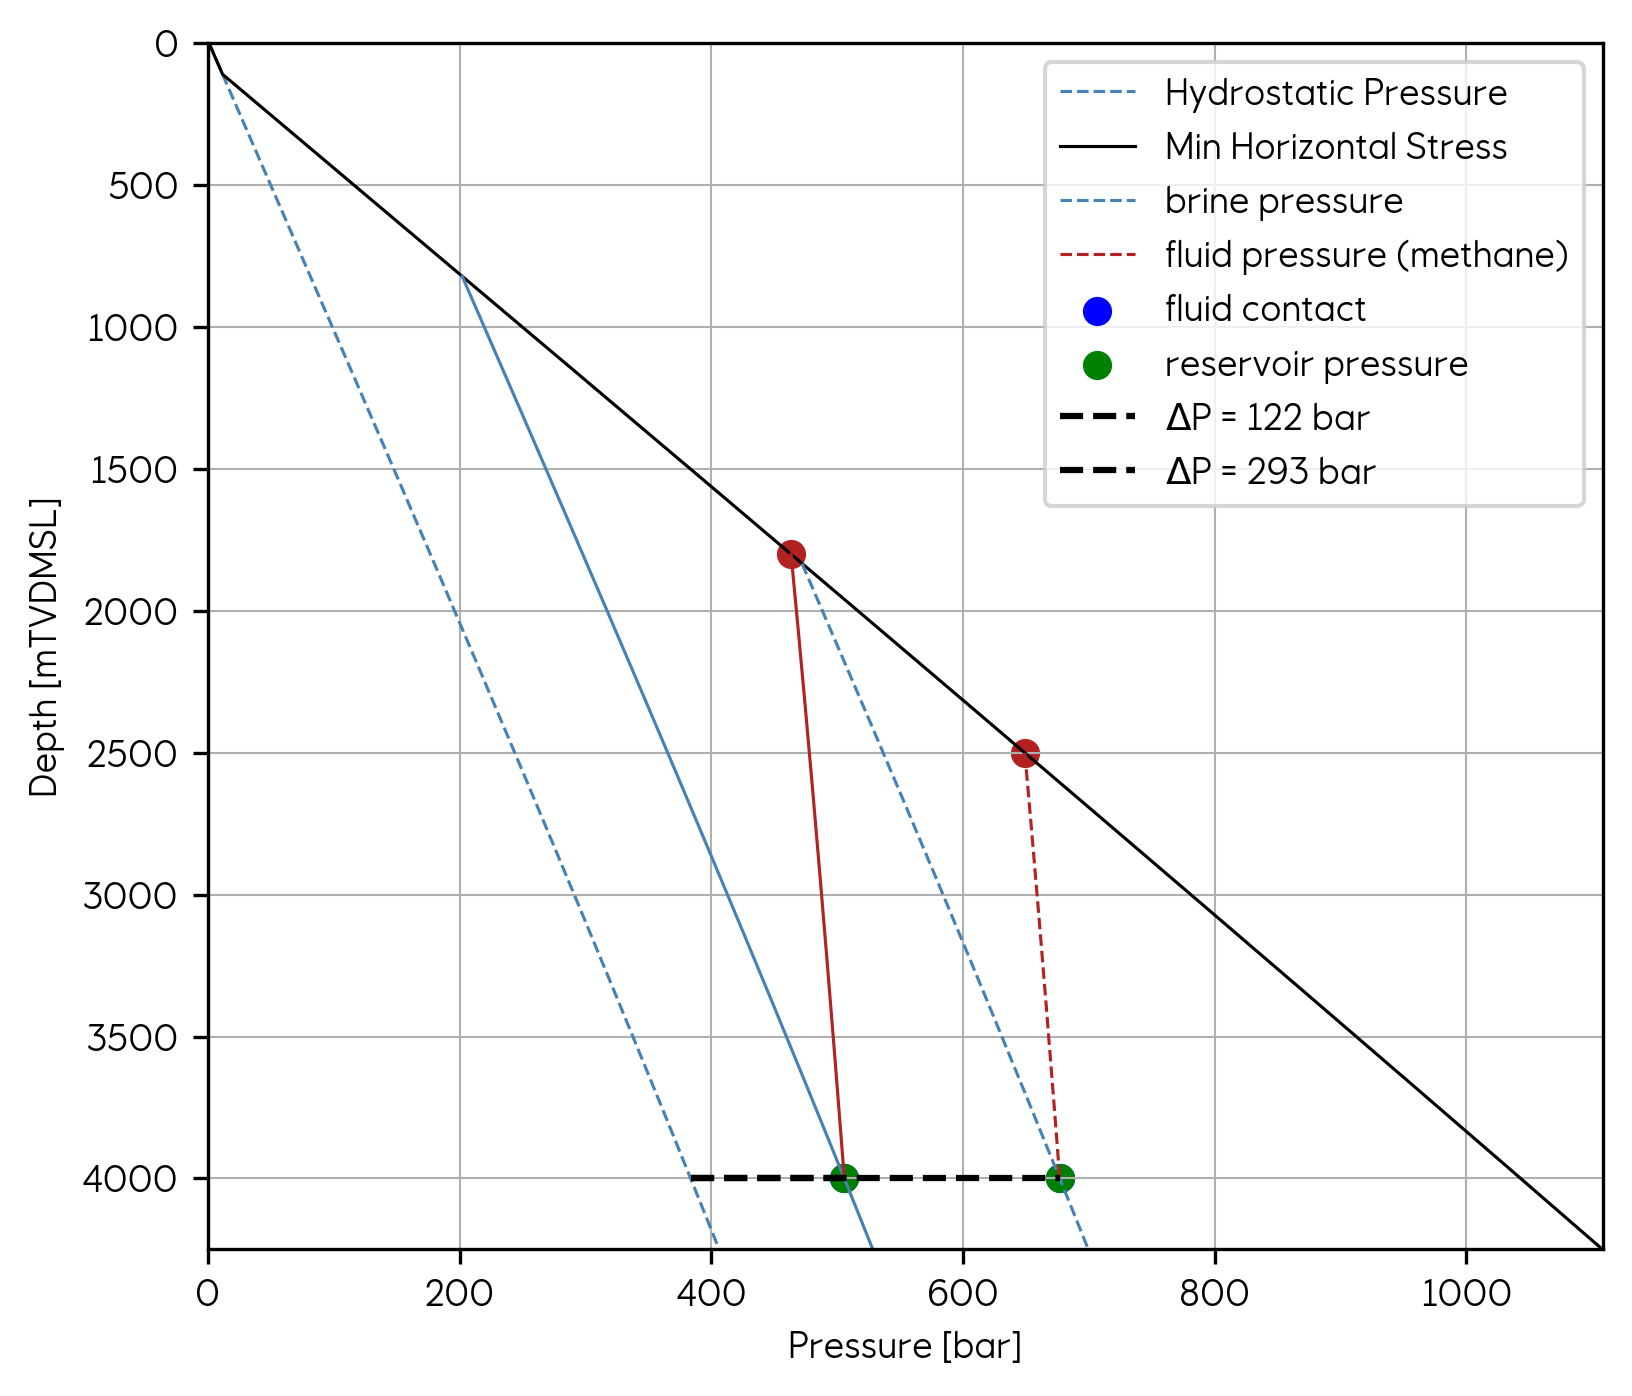

In [72]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 1: Minimum input (only fluid contact)

In [ ]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3500.)

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: hydrostatic


In [ ]:
my_pressure.manage_scenarios()

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: hydrostatic


In [ ]:
my_pressure.add_scenario('methane', fluid_type='methane', from_resrvr=True, z_fluid_contact=my_pressure.z_fluid_contact)

fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: methane


hydrostatic
methane


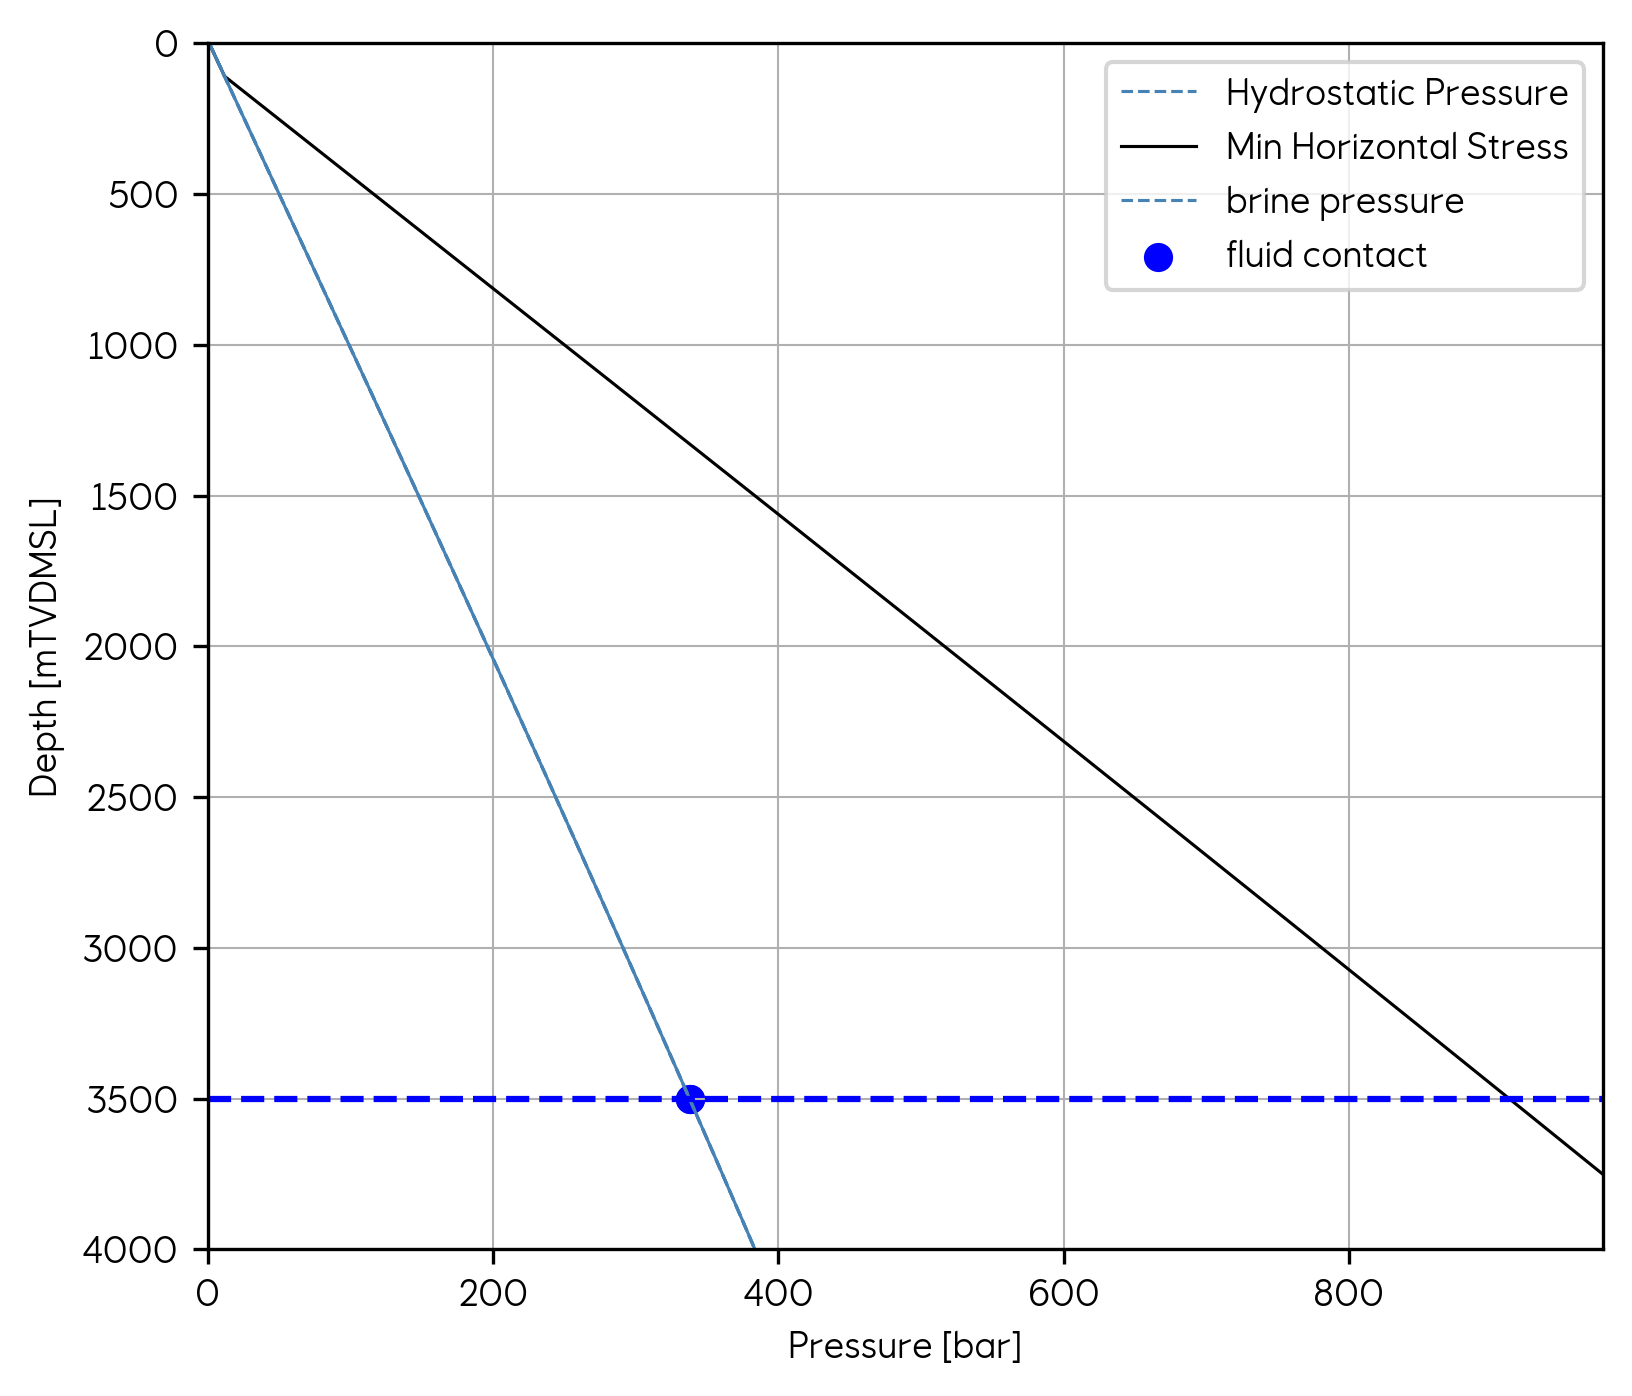

In [ ]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False
              )

ax.axhline(y=my_pressure.z_fluid_contact, color='blue', linestyle='--', label='Fluid contact')

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)
fig.tight_layout()

In [ ]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr       z_MSAD      p_MSAD  z_resrv     p_resrv  \
0  hydrostatic         True   585.146752  139.139674   3500.0  337.748983   
1      methane         True  1175.327879  296.917290   3500.0  337.748983   

   z_fluid_contact  p_fluid_contact  p_delta fluid_type fluid_composition  \
0           3500.0       337.748983        0   pure_co2          100% CO2   
1           3500.0       337.748983        0    methane          100% CH4   

  specific_gravity  
0             None  
1             None

hydrostatic
methane


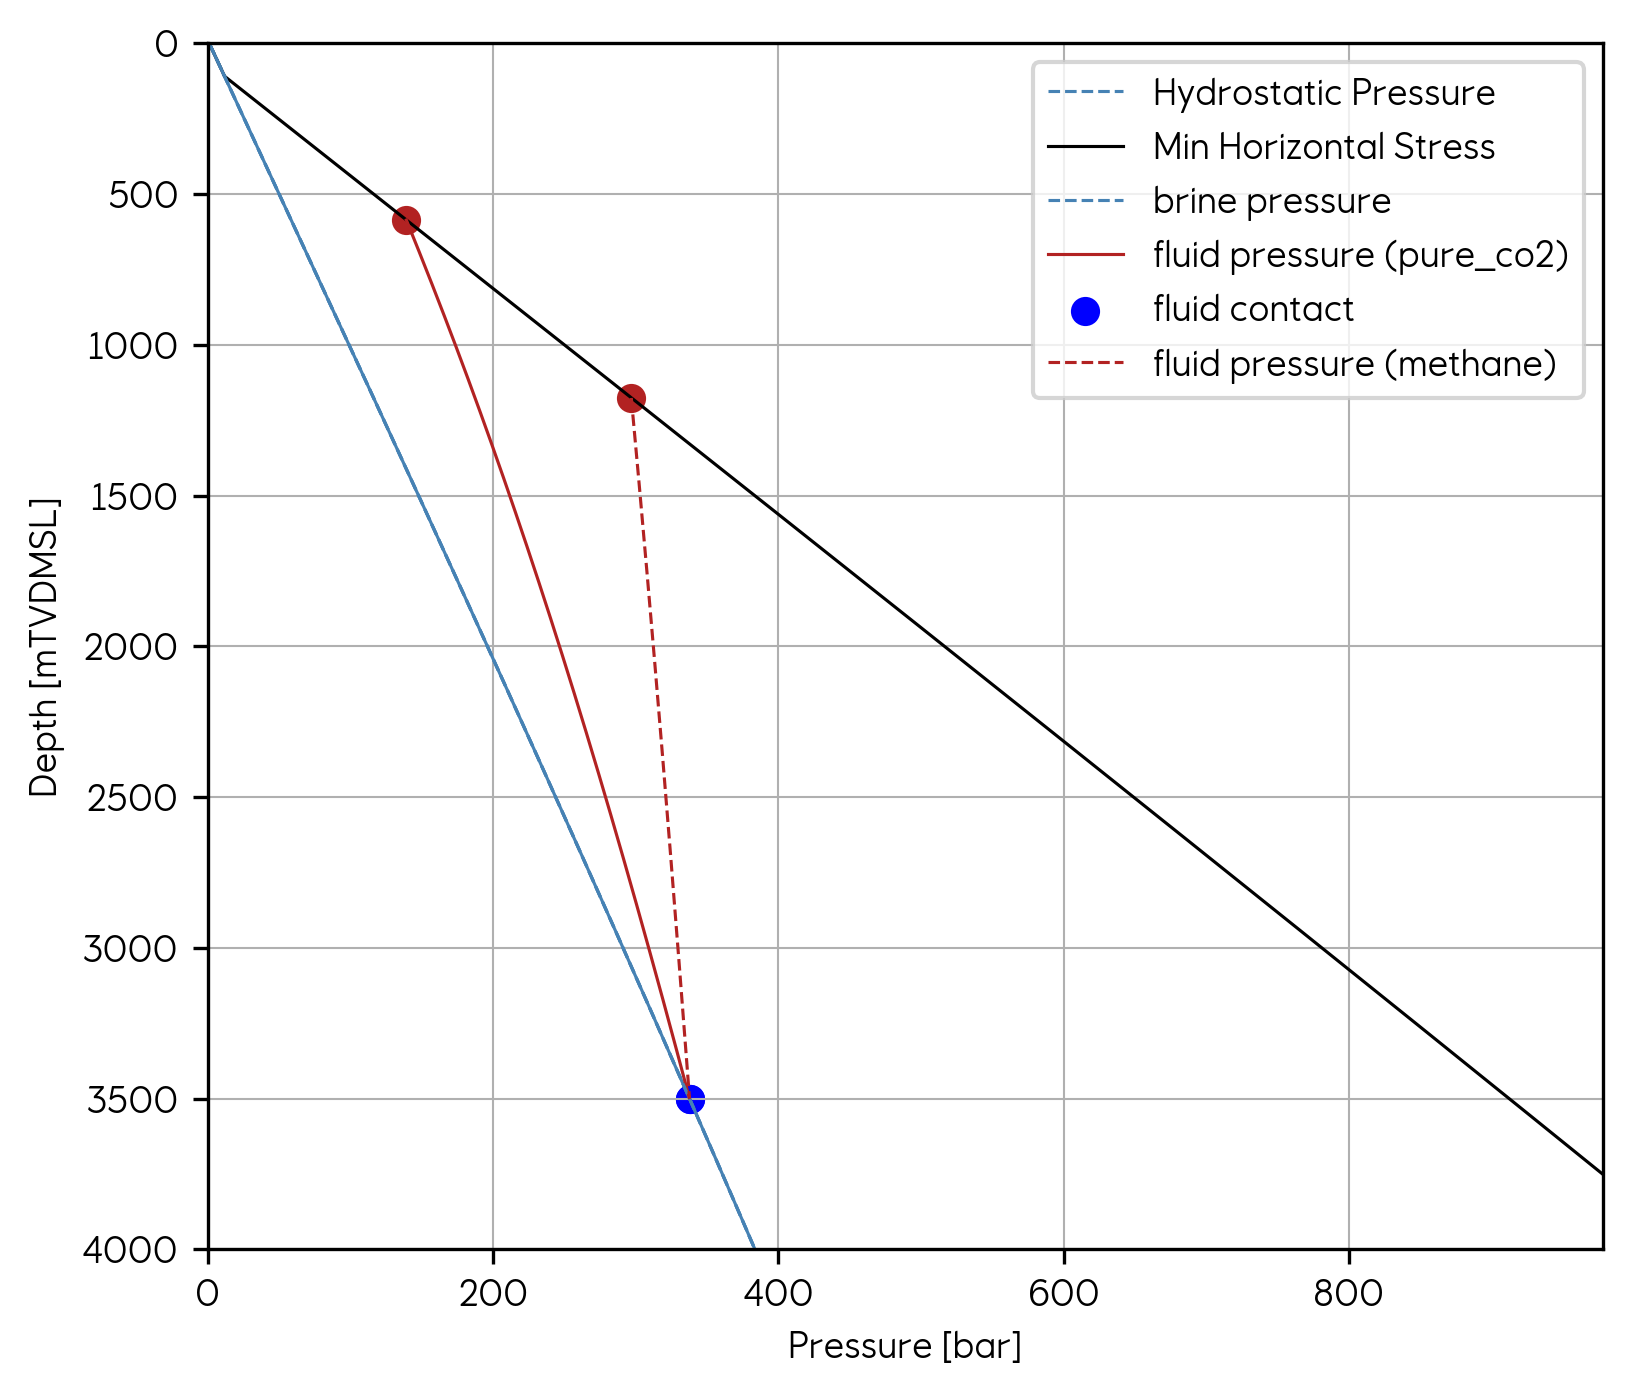

In [ ]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=True
              )

ax.set_ylim(bottom=my_pressure.z_fluid_contact+500)

fig.tight_layout()


## Example 2: Fluid contact + Delta P

In [ ]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       z_fluid_contact=3700.)

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: hydrostatic


In [ ]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_fluid_contact=3500, p_delta=50)

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: pure_co2


In [ ]:
my_pressure.scenario_manager.get_scenarios_summary()

name  from_resrvr      z_MSAD      p_MSAD  z_resrv     p_resrv  \
0  hydrostatic         True  612.746874  146.524496   3700.0  356.196879   
1     pure_co2         True  786.173464  192.916221   3500.0  387.748983   

   z_fluid_contact  p_fluid_contact  p_delta fluid_type fluid_composition  \
0           3700.0       356.196879        0   pure_co2          100% CO2   
1           3500.0       387.748983       50   pure_co2          100% CO2   

  specific_gravity  
0             None  
1             None

pure_co2


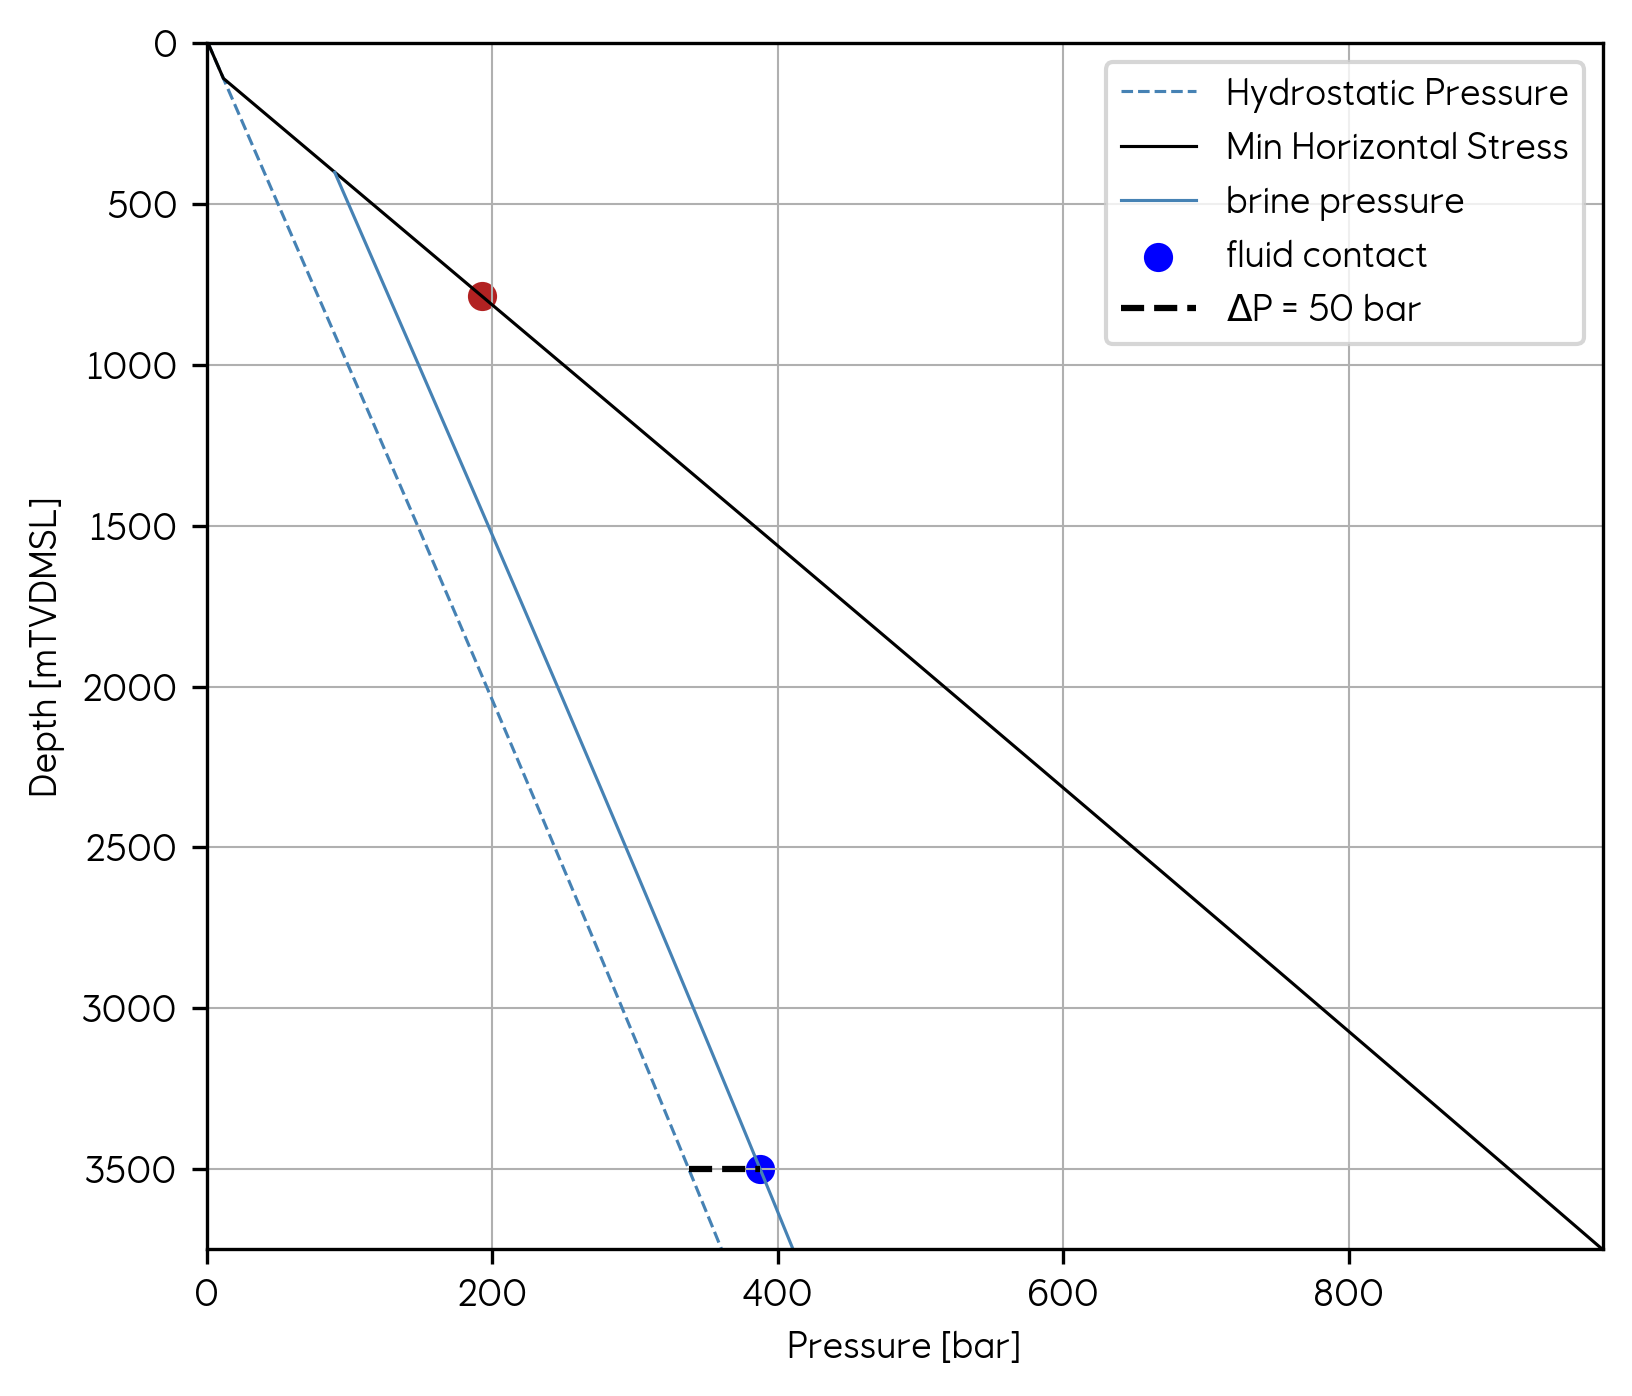

In [ ]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,
              plot_selected_scenarios=['pure_co2'])



fig.tight_layout()


## Example 3: Reservoir Pressure

In [ ]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [ ]:
my_pressure.add_scenario('pure_co2', fluid_type='pure_co2', from_resrvr=True, z_resrv=3400, p_resrv=380)  

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: pure_co2
self.z_fluid_contact=None


pure_co2


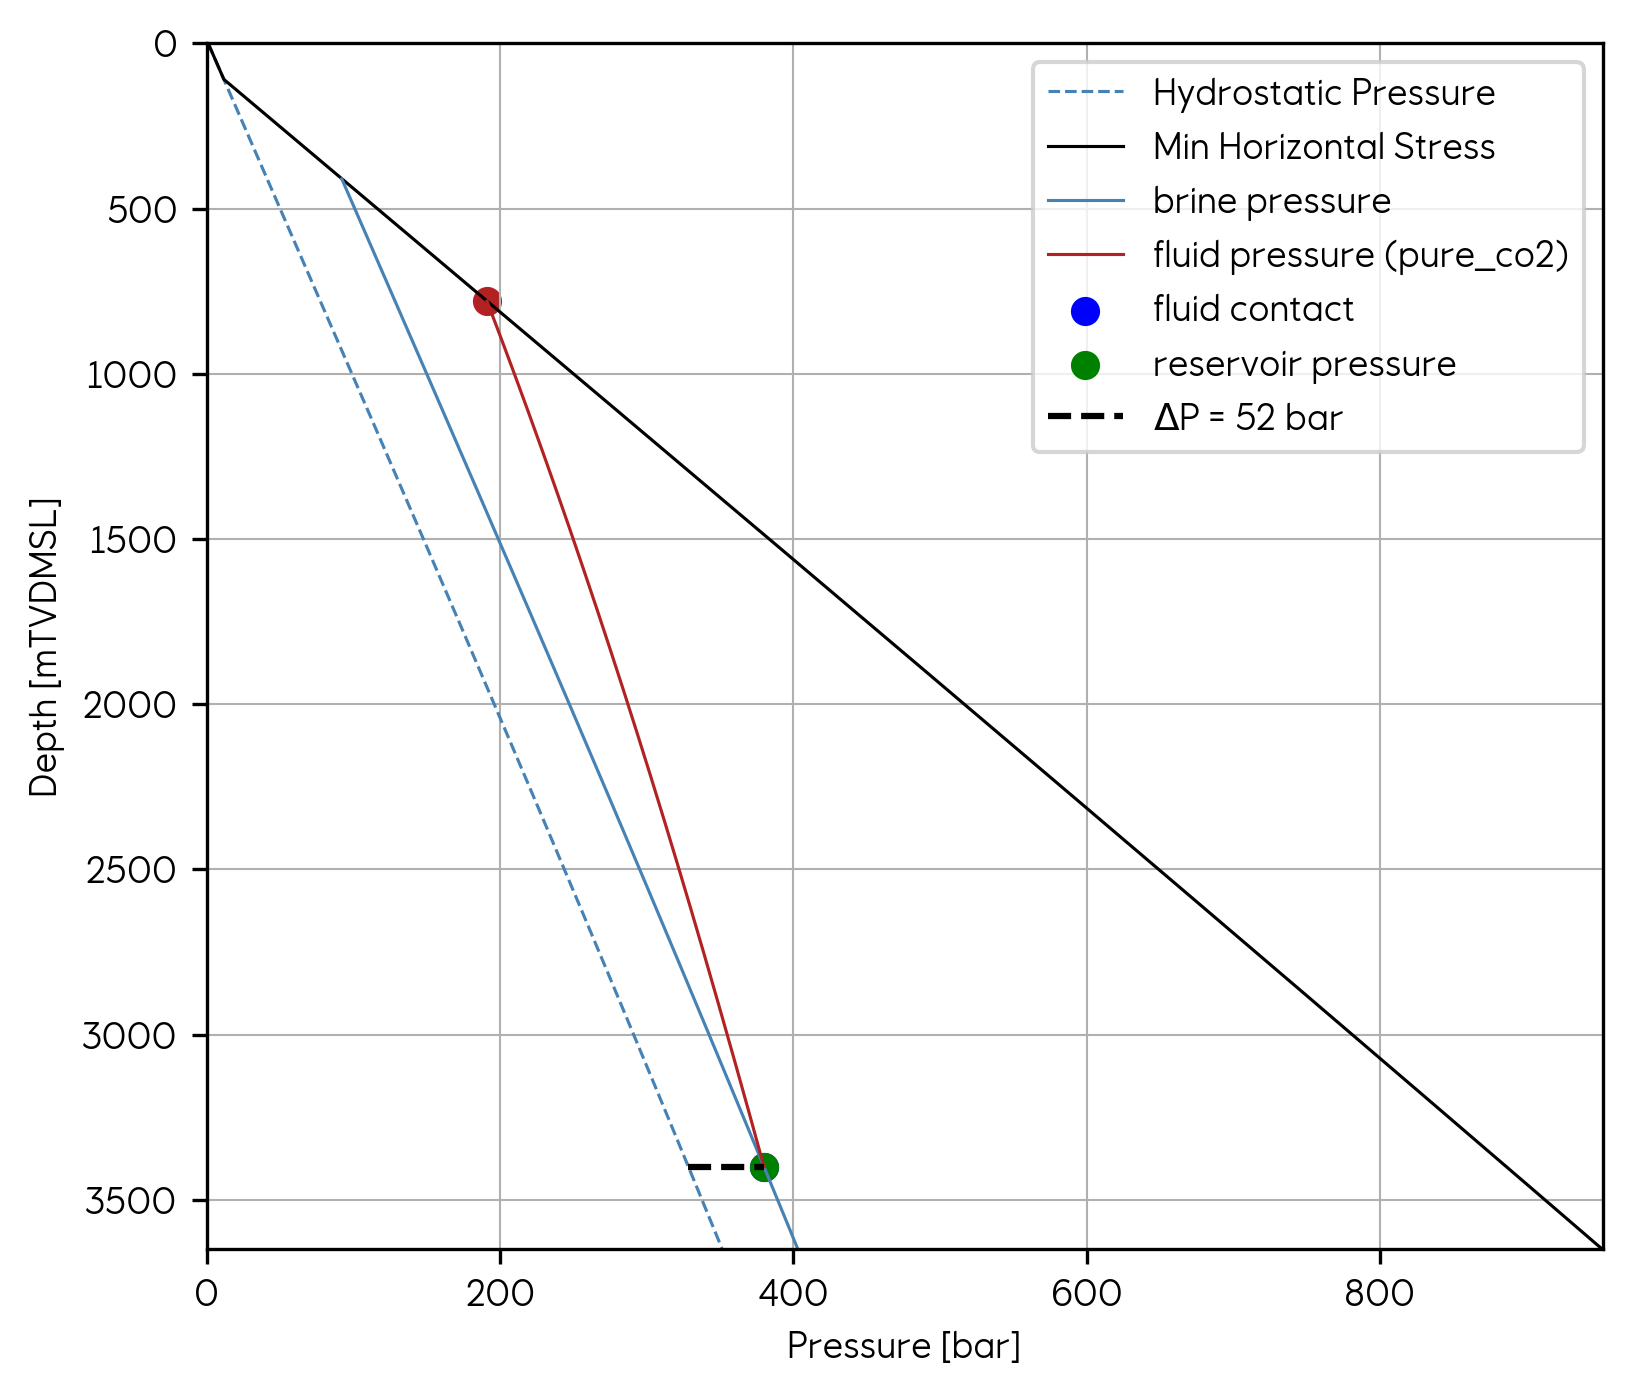

In [ ]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)


fig.tight_layout()


## Example 4: Reservoir Pressure + fluid contact


In [ ]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [ ]:
my_pressure.add_scenario('C1', fluid_type='methane', from_resrvr=True, z_resrv=3100, p_resrv=320, z_fluid_contact=3700)  

fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: C1
self.z_fluid_contact=3700
Lines do not intersect


C1


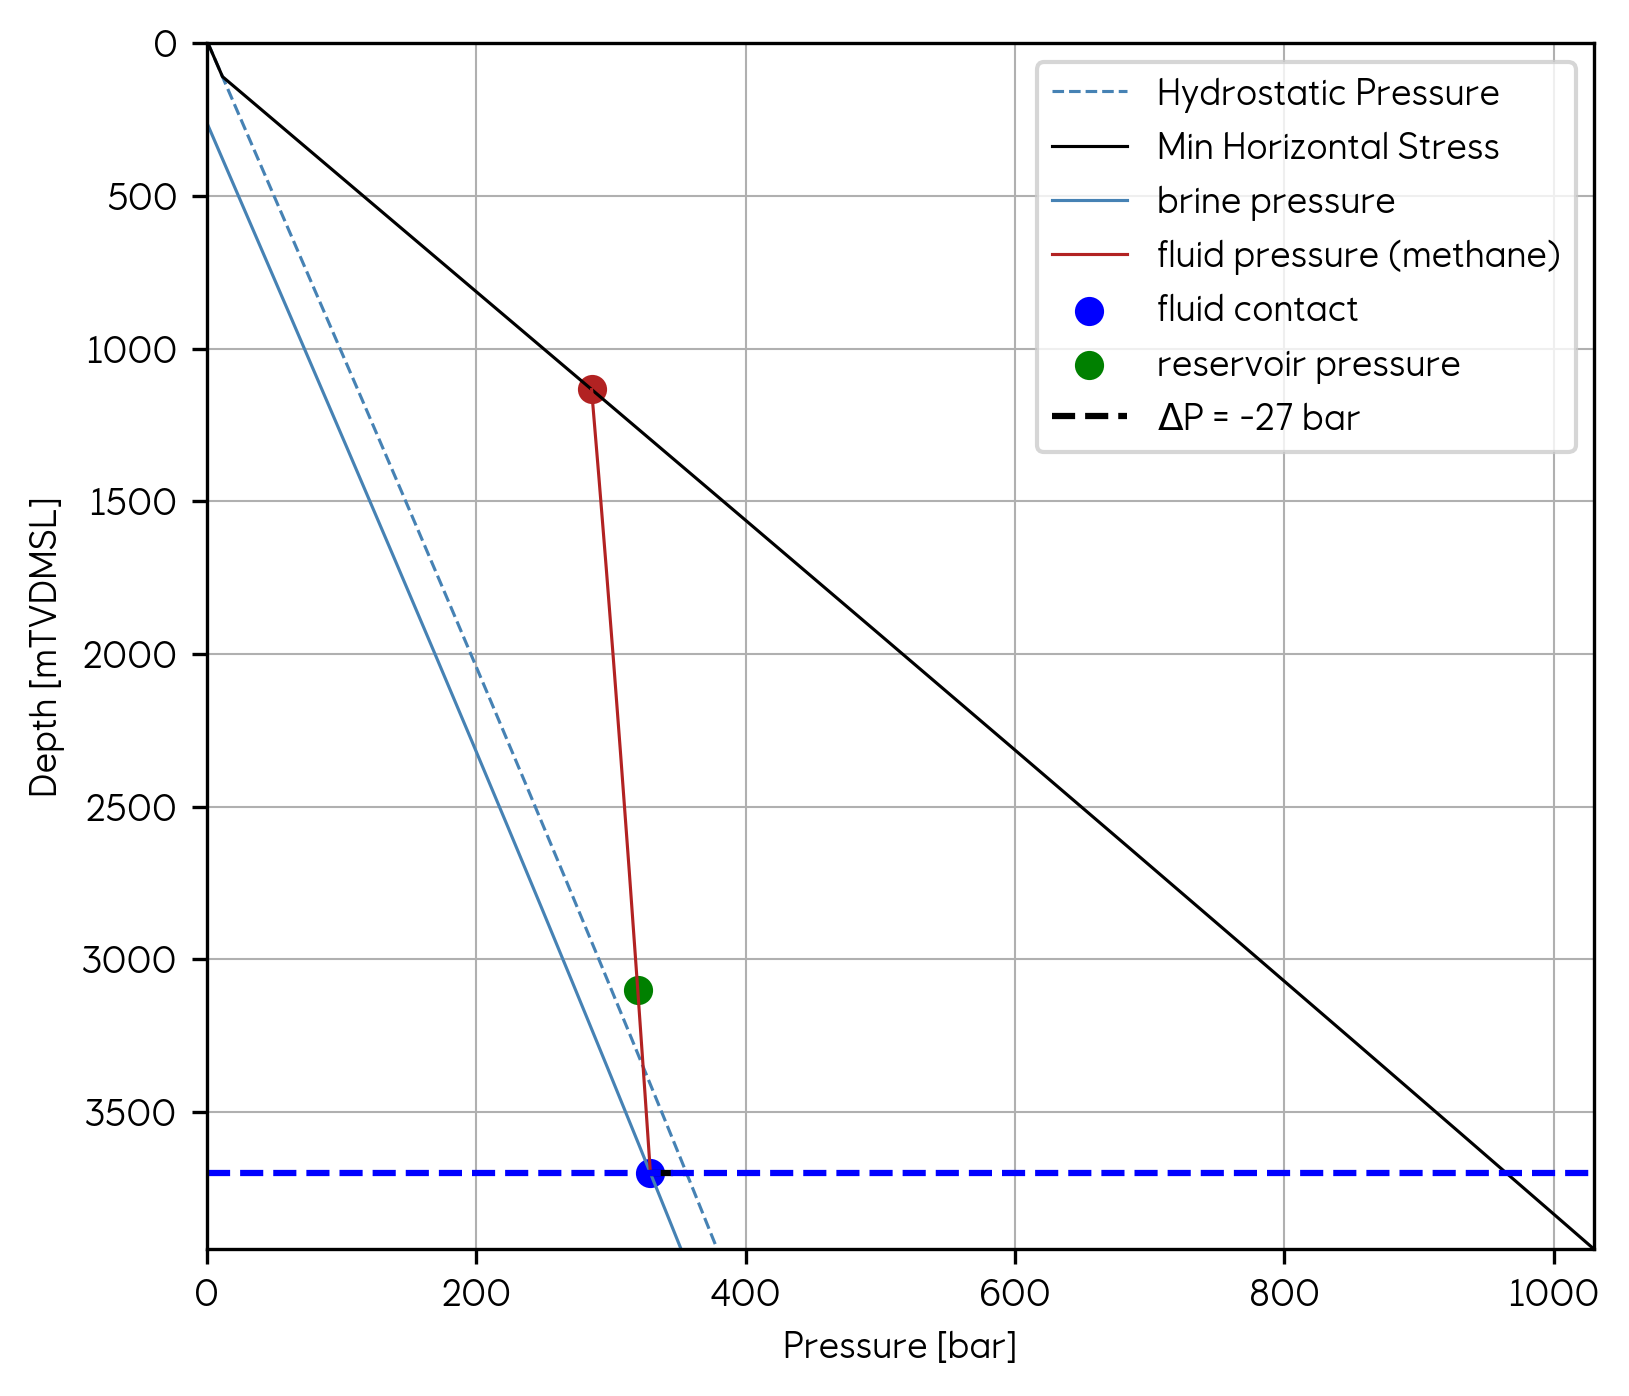

In [ ]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 5: Multiple reservoirs


In [ ]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [ ]:
my_pressure.add_scenario('top r', fluid_type='methane', from_resrvr=True, z_resrv=3000, p_resrv=310, z_fluid_contact=3200)  
my_pressure.add_scenario('bottom r', fluid_type='methane', from_resrvr=True, z_fluid_contact=3700, p_delta=50)  

fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: top r
self.z_fluid_contact=3200
fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: bottom r


top r
bottom r


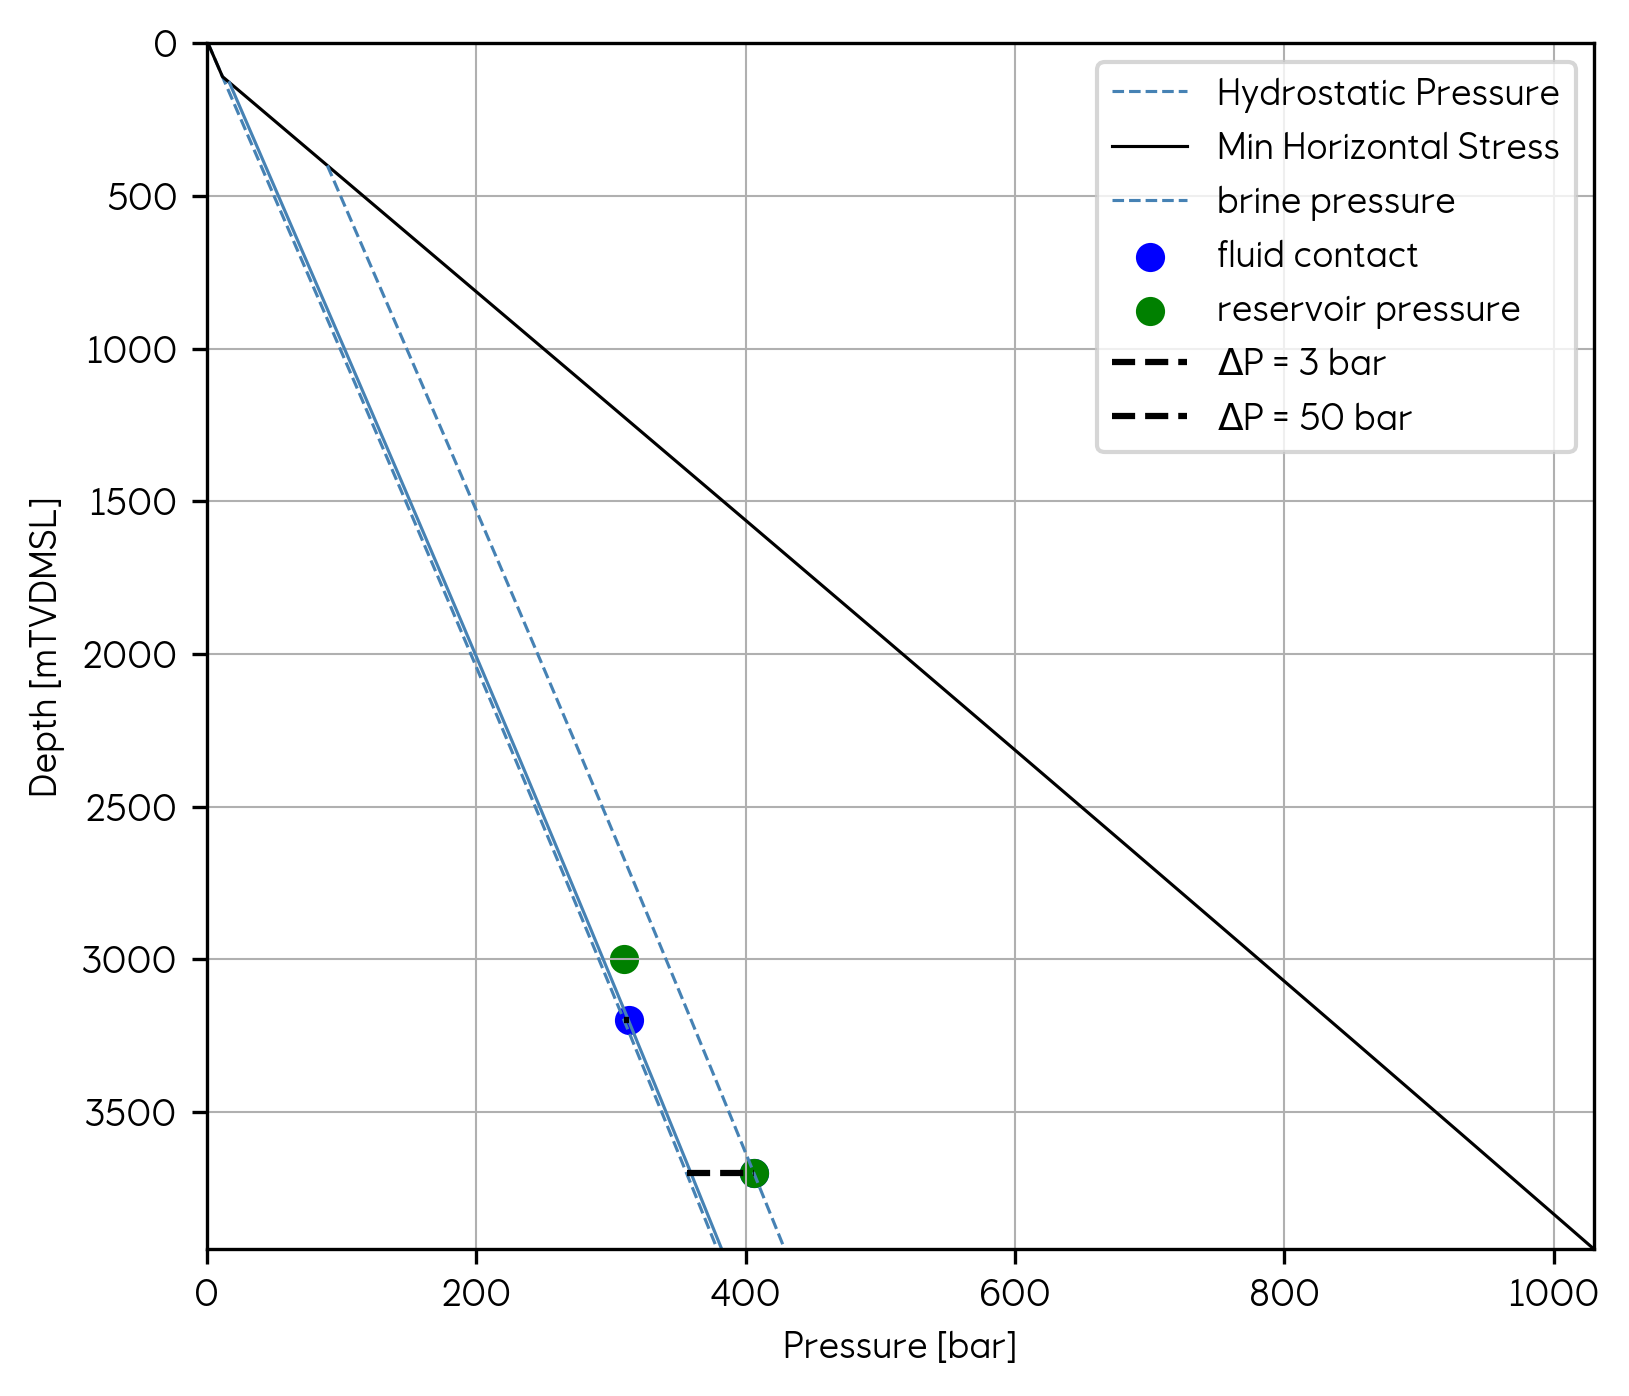

In [ ]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,)


fig.tight_layout()


top r
bottom r


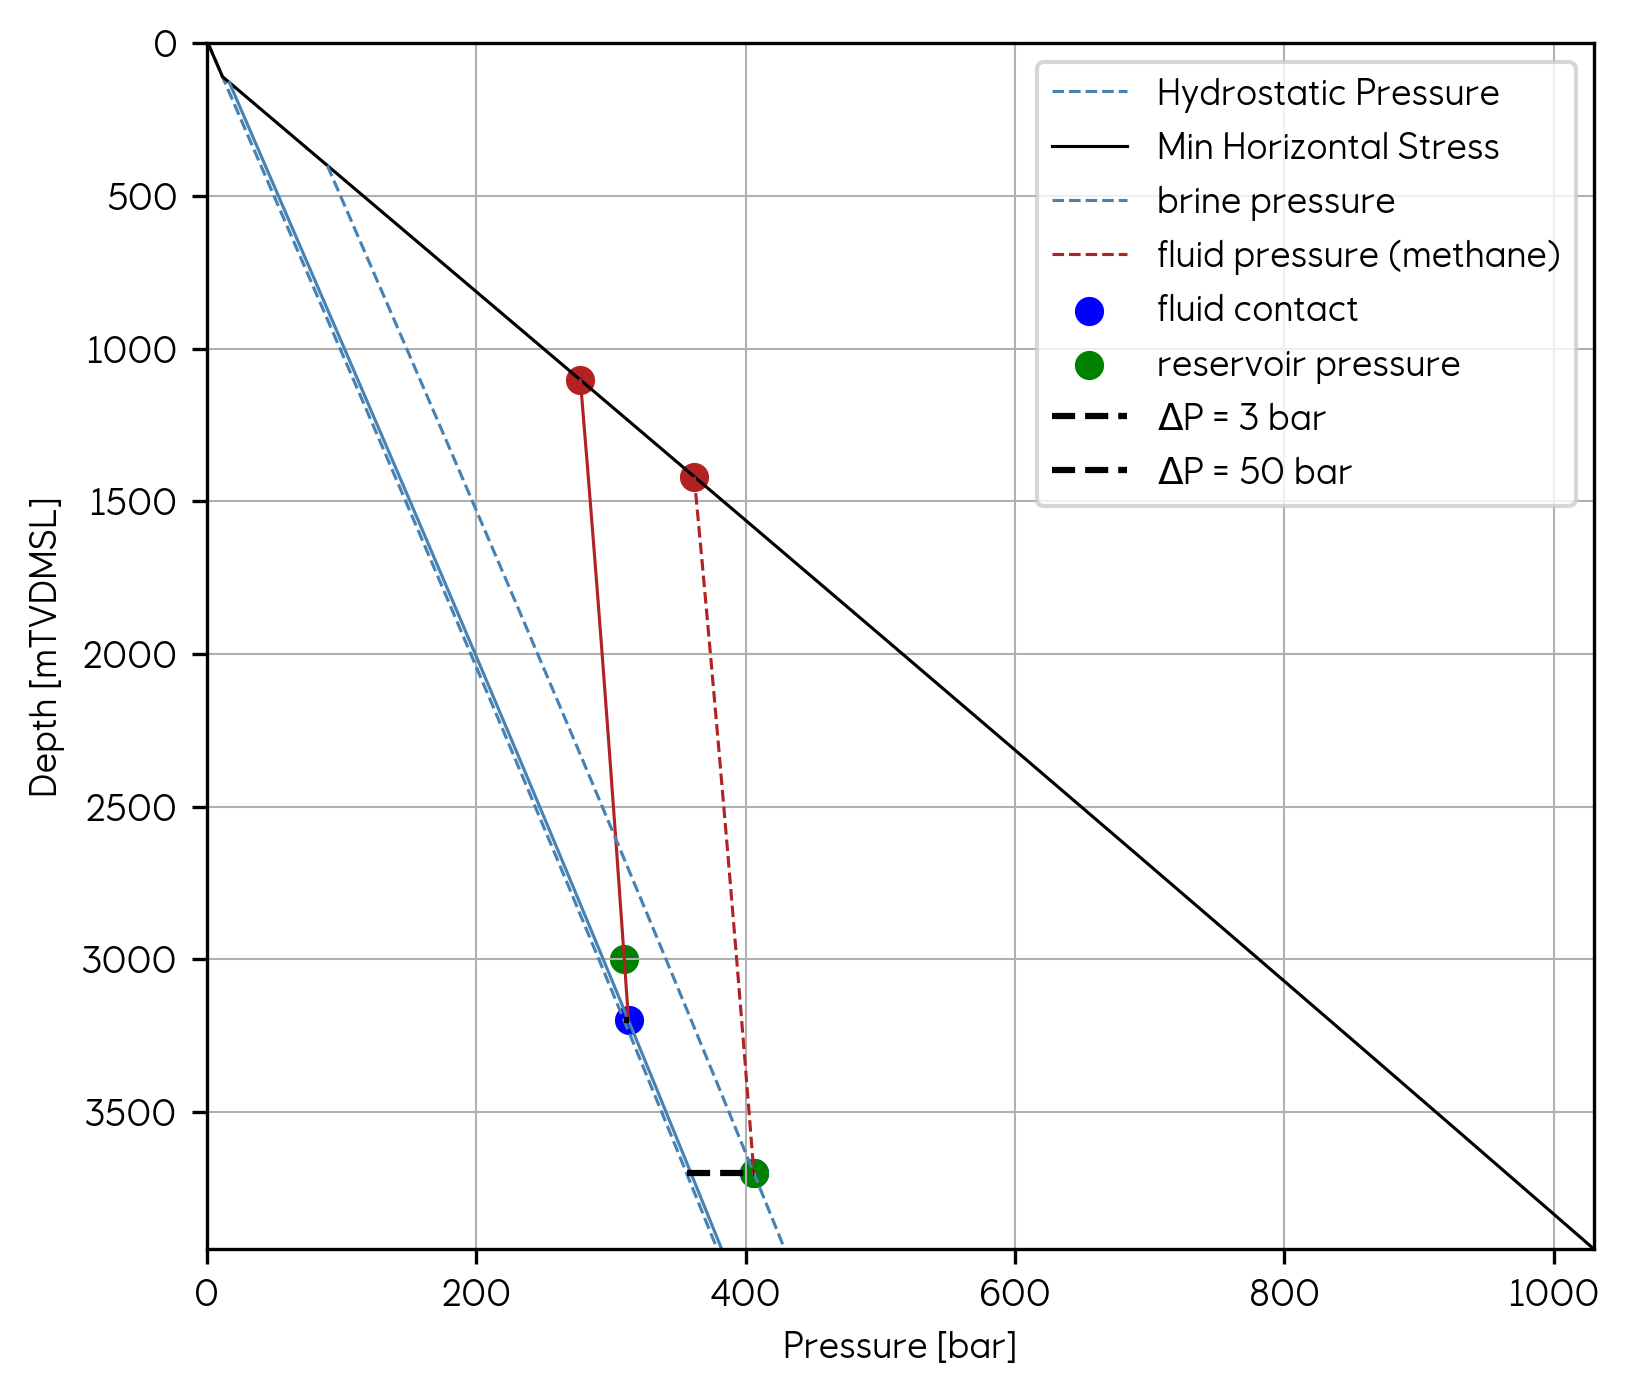

In [ ]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 6: Compute pressure profile downwards from MSAD


In [ ]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)

In [ ]:
my_pressure.add_scenario('Plug1', fluid_type='methane', from_resrvr=False,  z_MSAD=1800, z_fluid_contact=4000)    
my_pressure.add_scenario('Plug2', fluid_type='methane', from_resrvr=False,  z_MSAD=2500, z_fluid_contact=4000)  


fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: Plug1
fluid_type='methane' self.fluid_type='pure_co2'
Computing pressure profile for scenario: Plug2


Plug1
Plug2


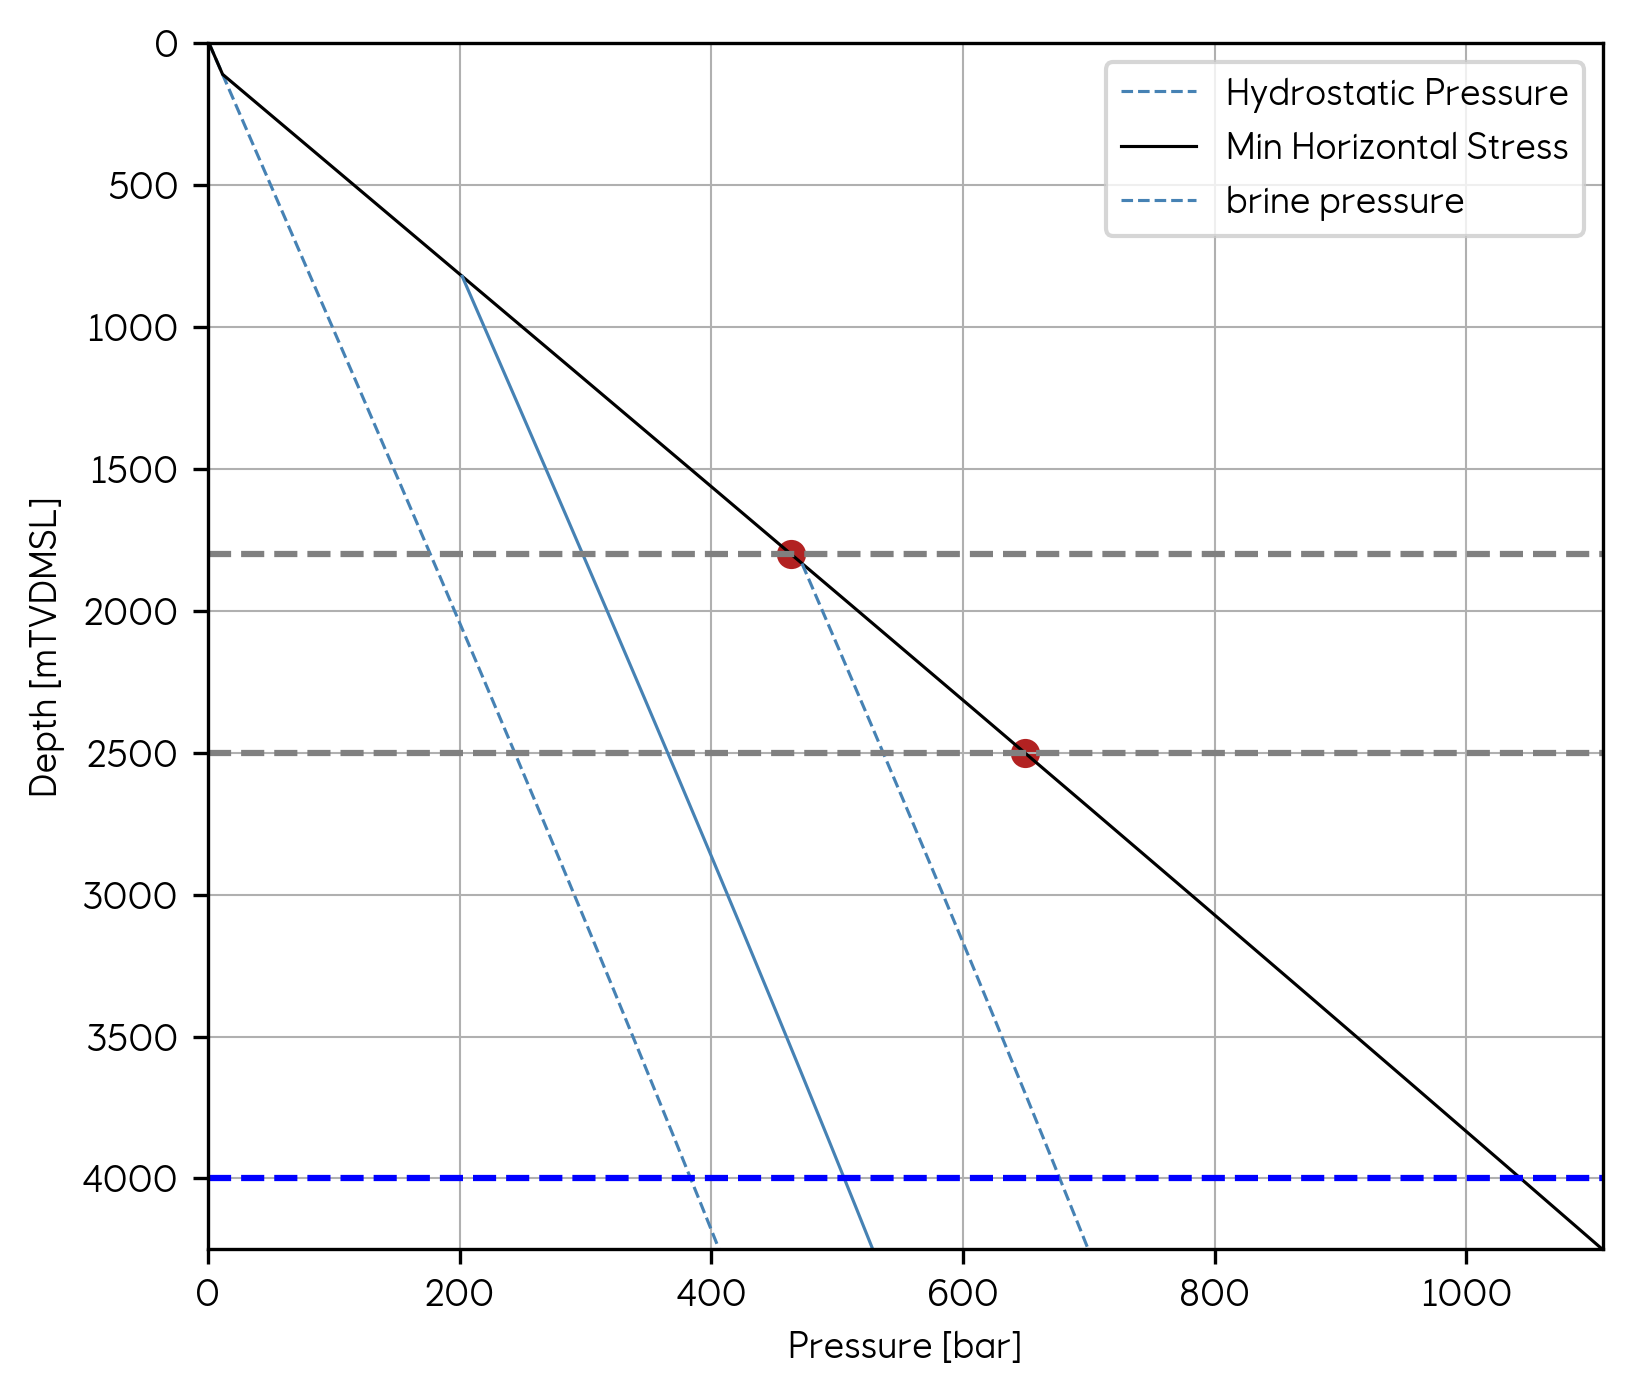

In [ ]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=False, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=False, #plot delta p
              plot_fluid_pressure=False,)

ax.axhline(y=1800, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=2500, color='gray', linestyle='--', label='Fluid contact')
ax.axhline(y=4000, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


Plug1
Plug2


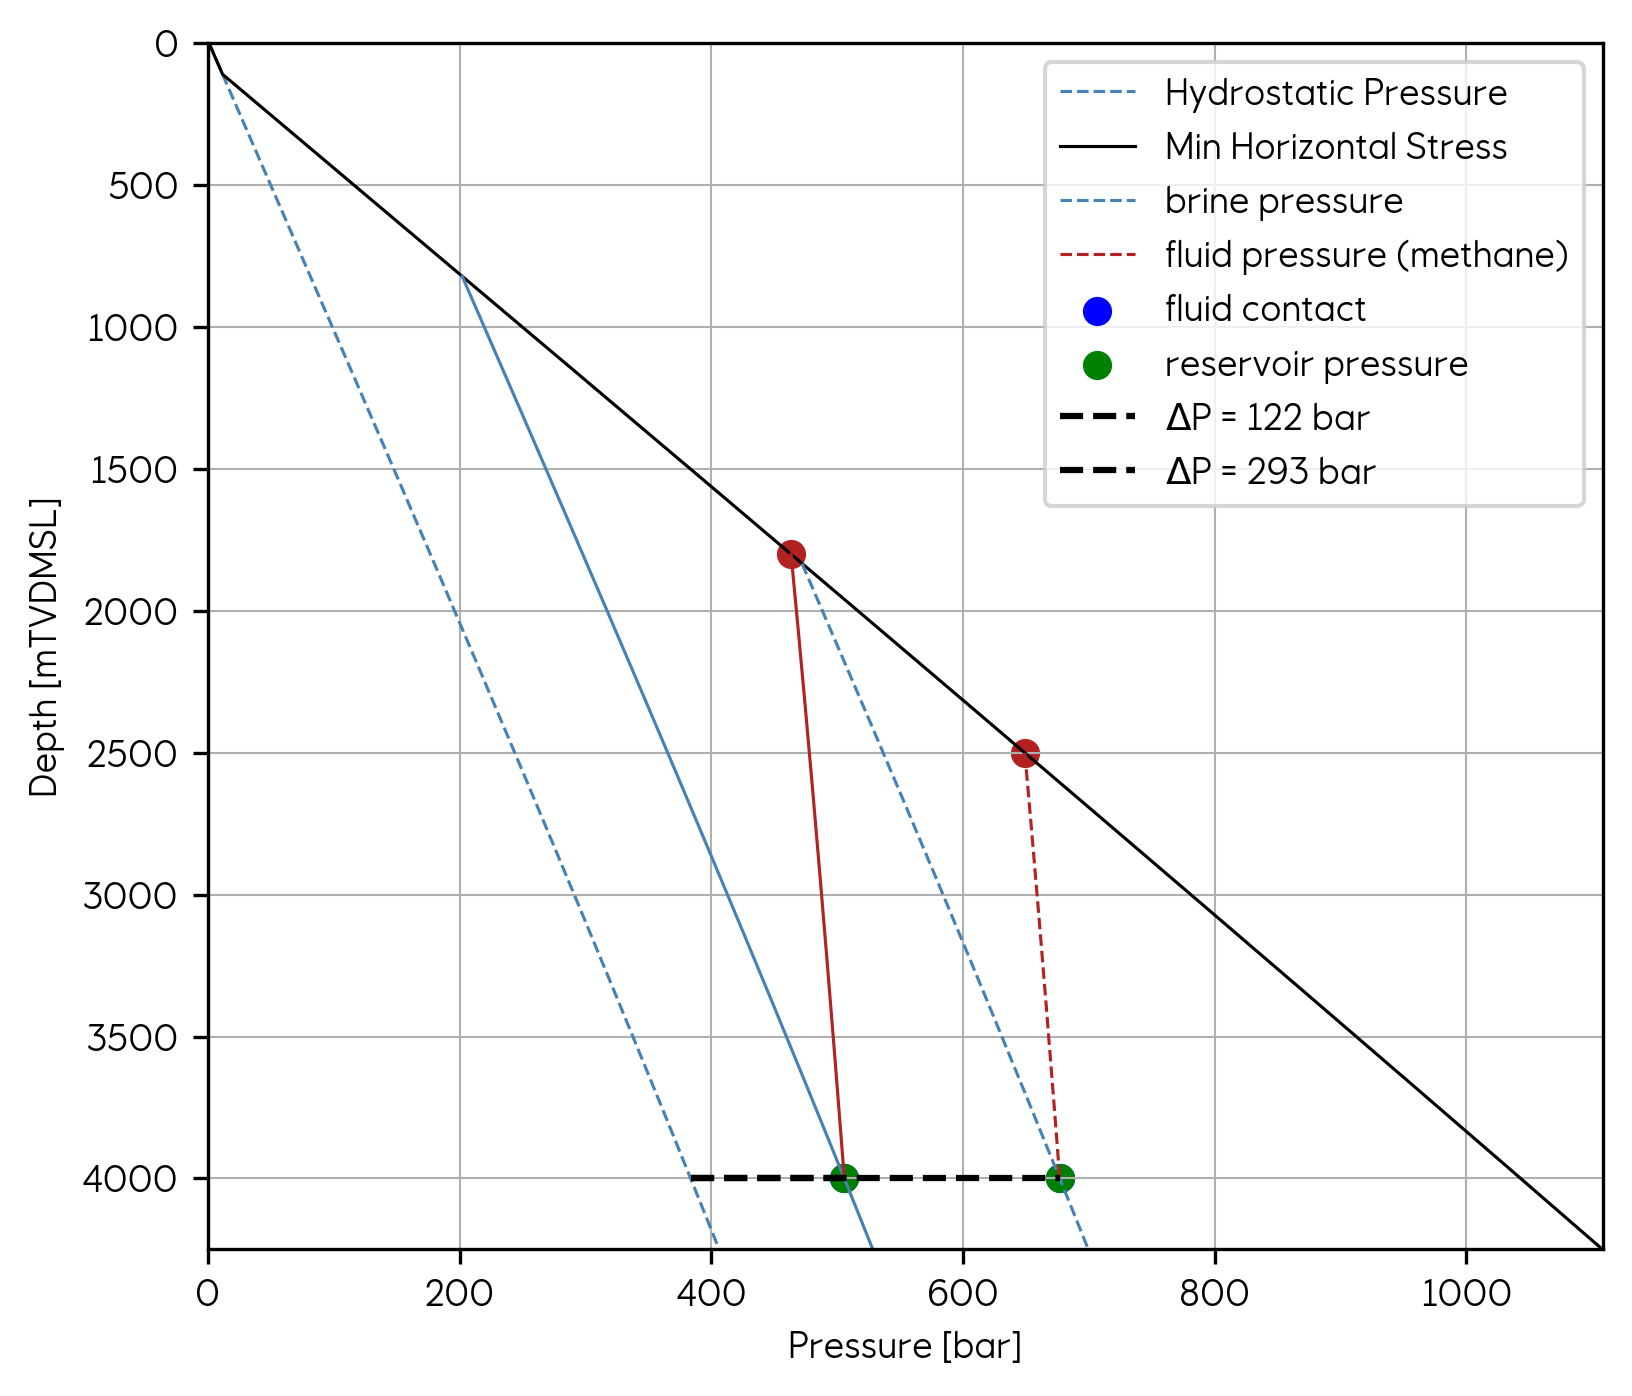

In [ ]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=True,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: saline1
fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: saline2
fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: depleted
Lines do not intersect
saline1
saline2
depleted


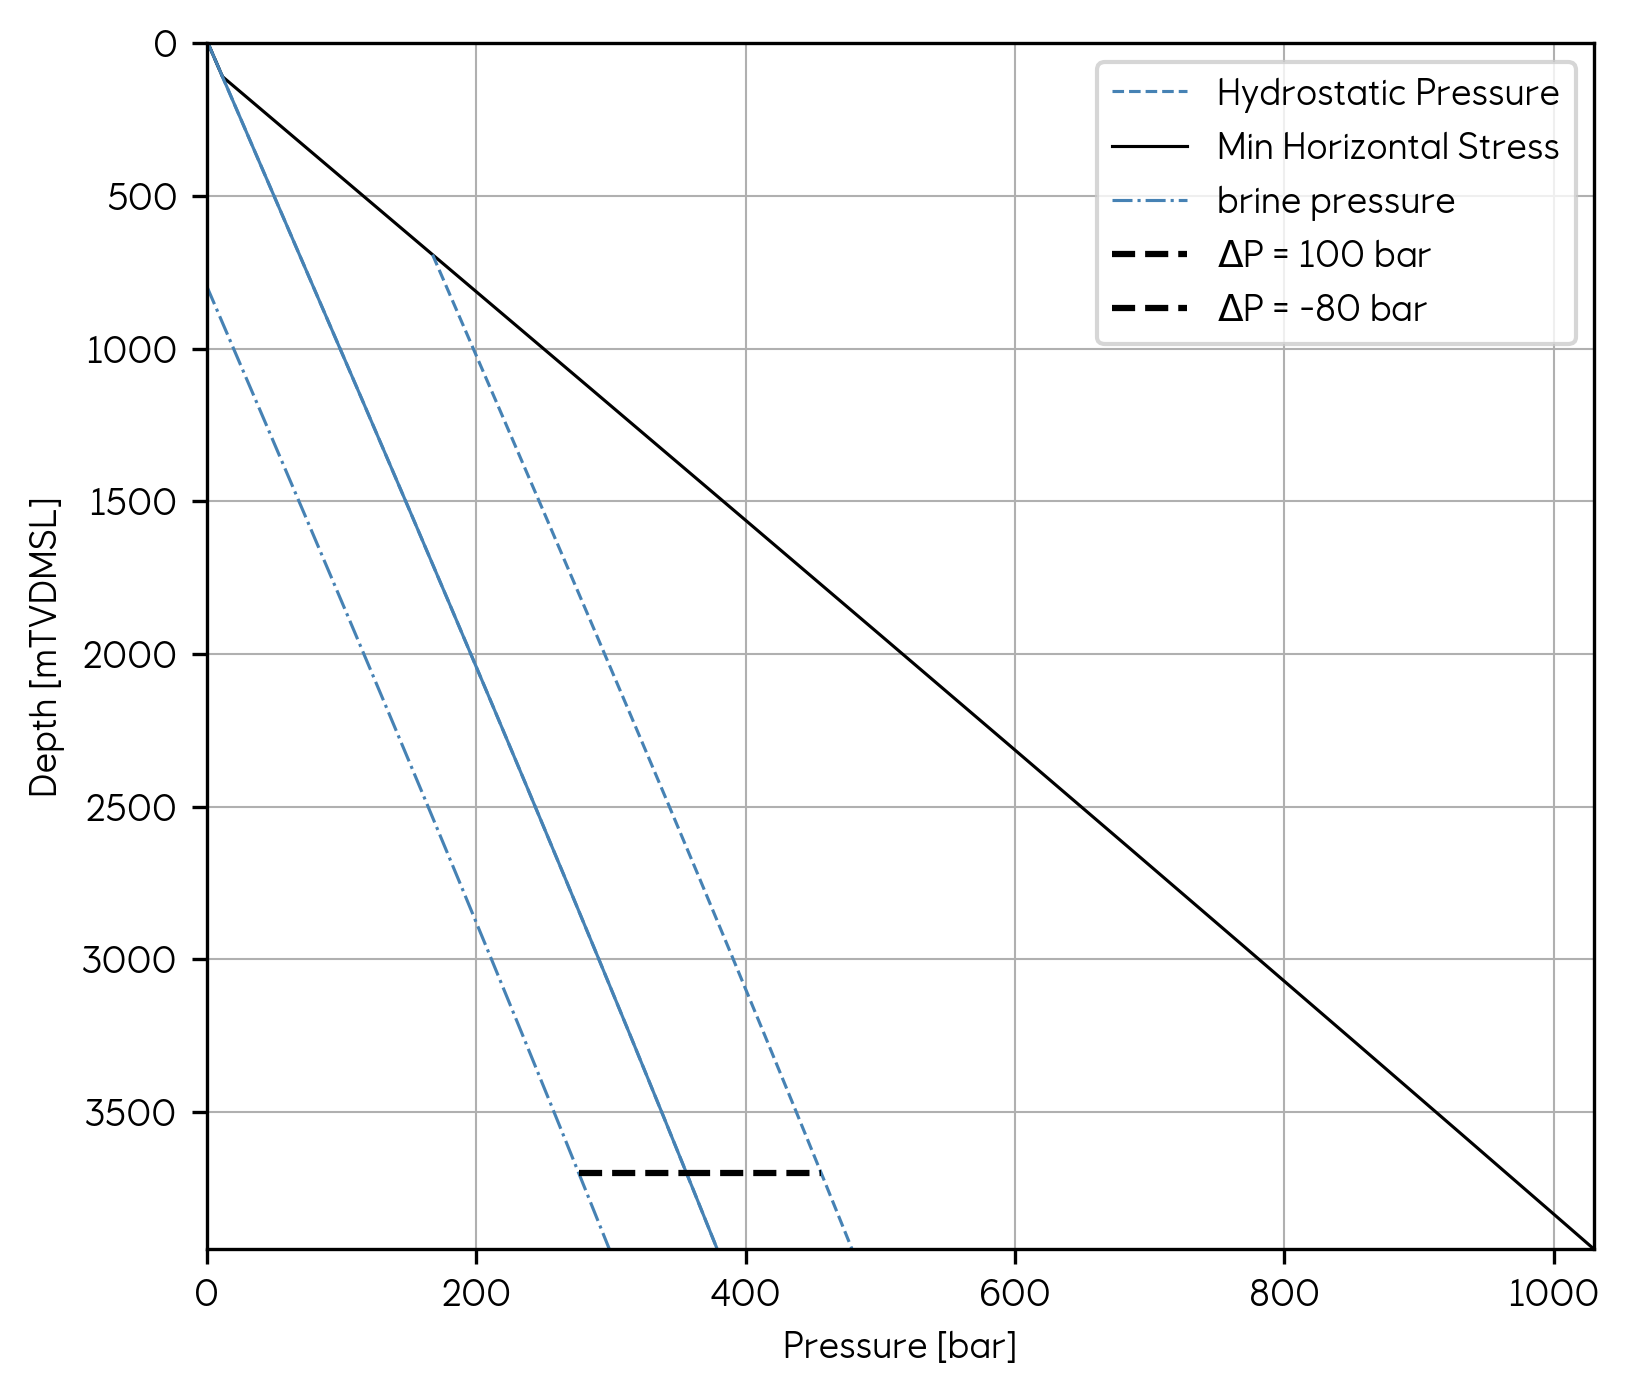

In [ ]:
my_pressure = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False)


my_pressure.add_scenario('saline1', fluid_type='pure_co2',  from_resrvr=True,  z_fluid_contact=3700, p_delta= 0)    
my_pressure.add_scenario('saline2', fluid_type='pure_co2',  from_resrvr=True,  z_fluid_contact=3700, p_delta= 100)  
my_pressure.add_scenario('depleted', fluid_type='pure_co2', from_resrvr=True,  z_fluid_contact=3700, p_delta= -80)  

rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= False, #plot minimum safety abandonment depth,
              plot_fluid_contact=False, #plot fluid contact
              plot_resrv=False, #plot reservoir
              plot_delta_p=True, #plot delta p
              plot_fluid_pressure=False,)

# ax.axhline(y=3700, color='blue', linestyle='--', label='Fluid contact')

fig.tight_layout()


## Example 7: Compute pressure profile with input Shmin curve


In [98]:

winc_file_path = r'../test_data/examples/winc/gradients.json'

with open(winc_file_path, 'r') as file:
    data = json.load(file)

# Now `data` is a Python object that contains the data from your JSON file
data[0].keys()

dict_keys(['curveType', 'curveName', 'depthType', 'curveUnits', 'depthUnits', 'wellboreName', 'depthMsl', 'curveValue'])

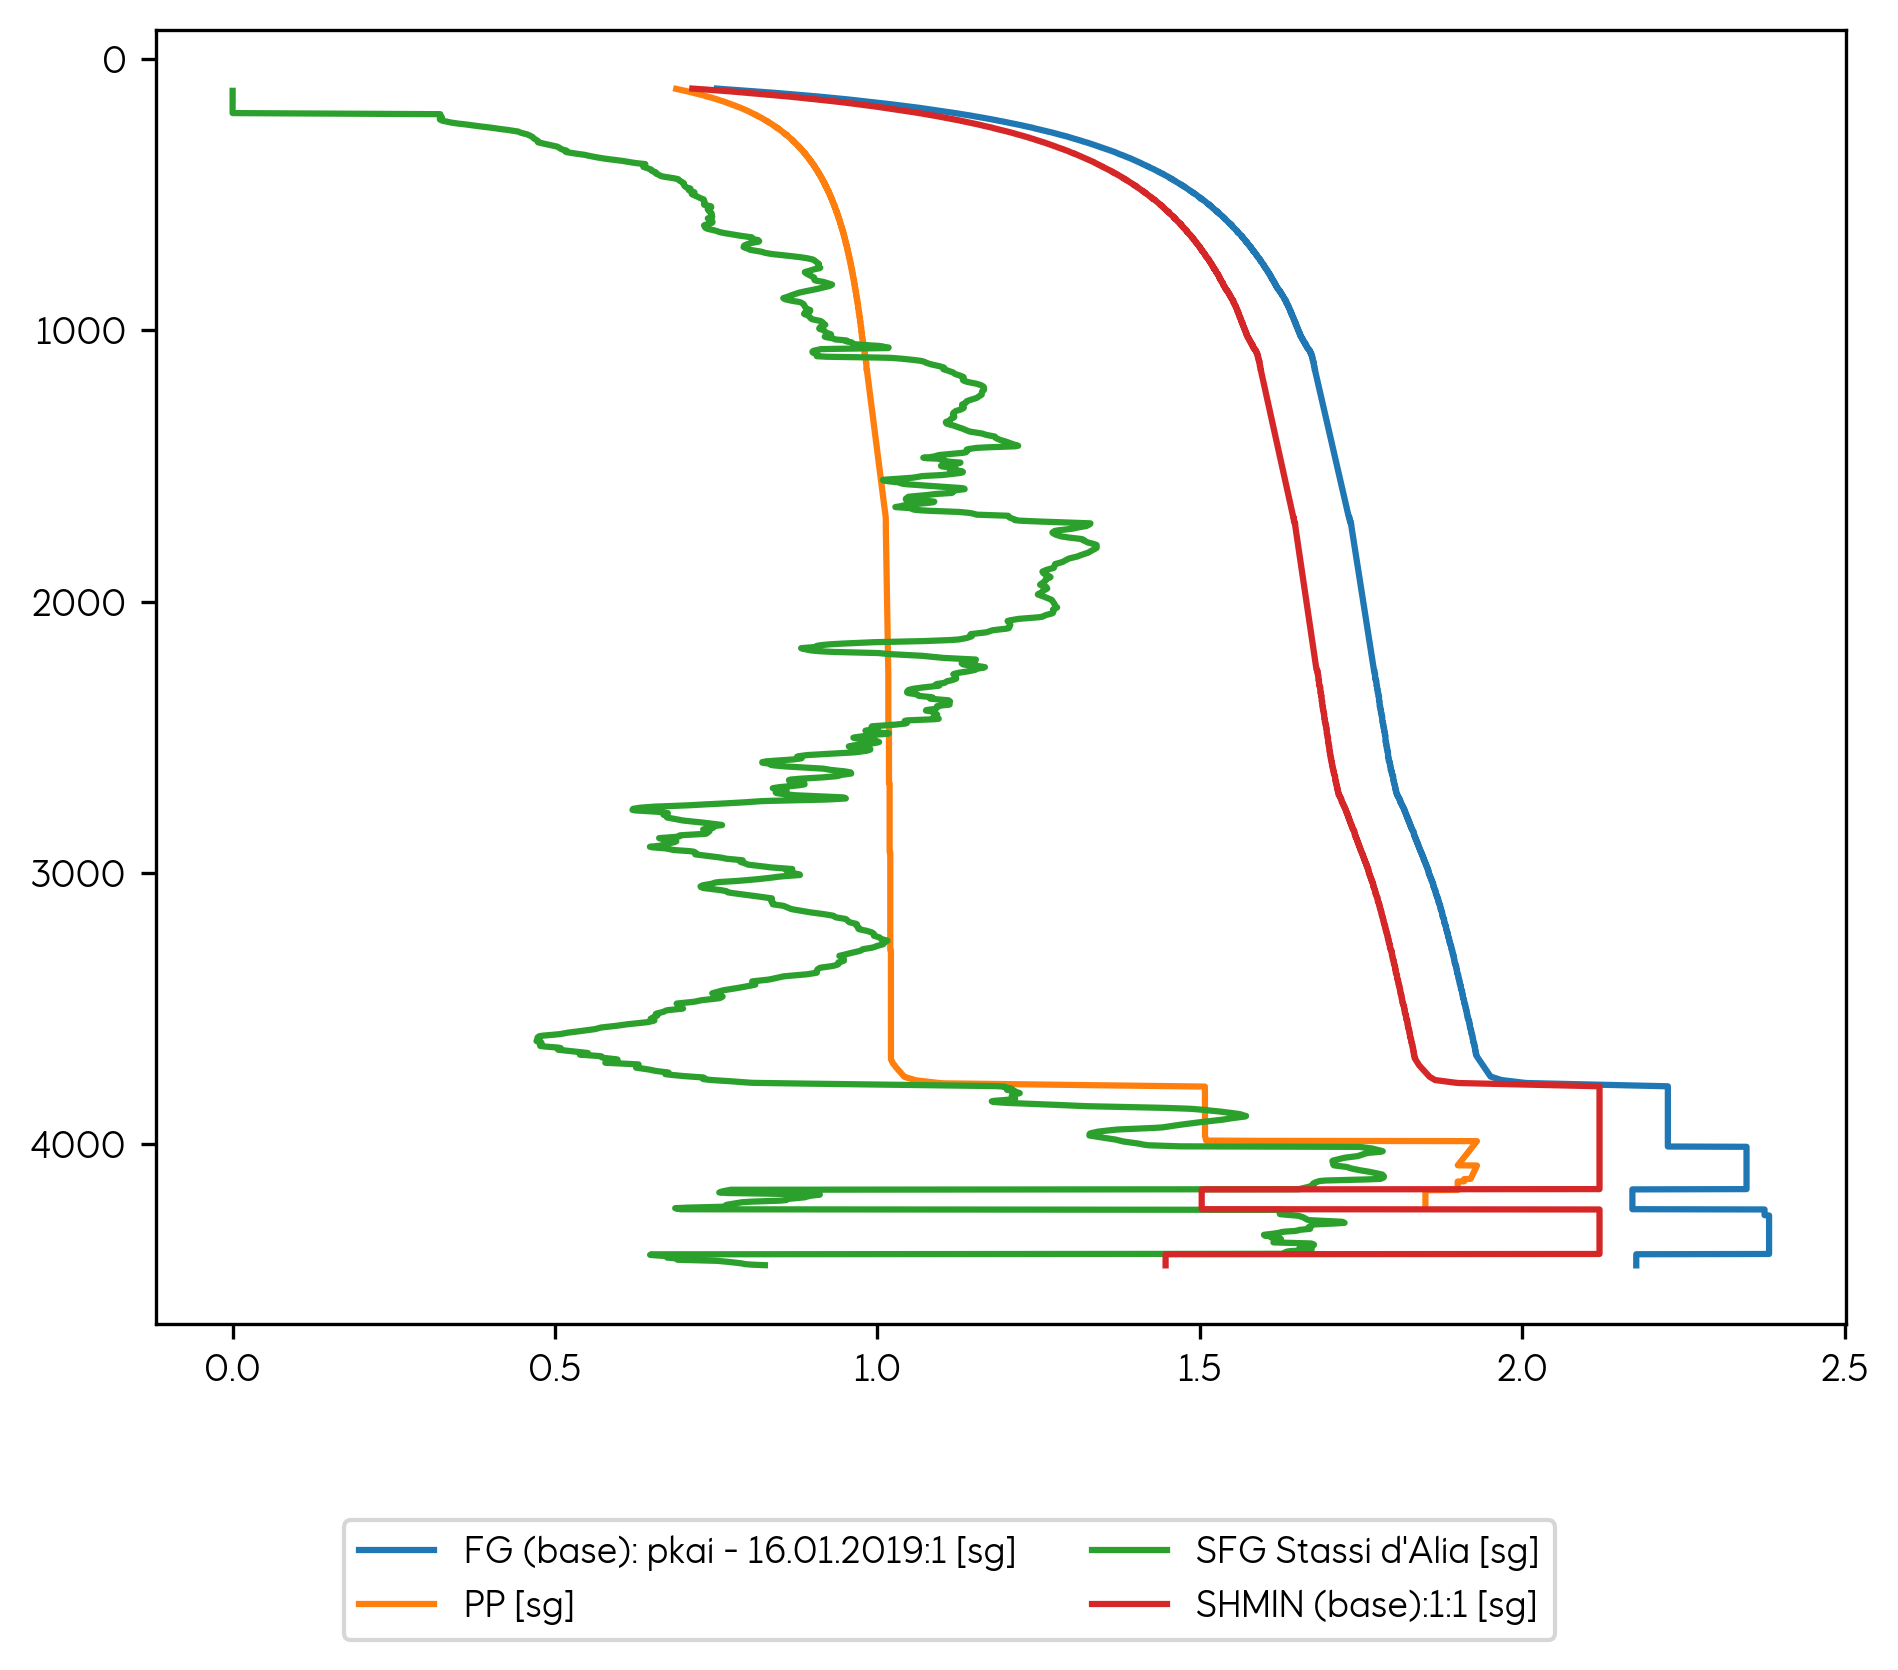

In [99]:

fig, ax = plt.subplots()

for curve in data:
    depth = curve['depthMsl']
    gradient = curve['curveValue'] 
    gradient_name = curve['curveName']
    gradient_units = curve['curveUnits']
    ax.plot(gradient, depth, label = f'{gradient_name} [{gradient_units}]')

ax.invert_yaxis()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.tight_layout()

manual_shmin_z= np.array(data[3]['depthMsl'])
manual_shmin_sg= np.array(data[3]['curveValue'])
manual_shmin_pg= manual_shmin_sg * 1e3 * const.g / const.bar
manual_shmin_p = manual_shmin_pg * manual_shmin_z



saline1
saline2
depleted


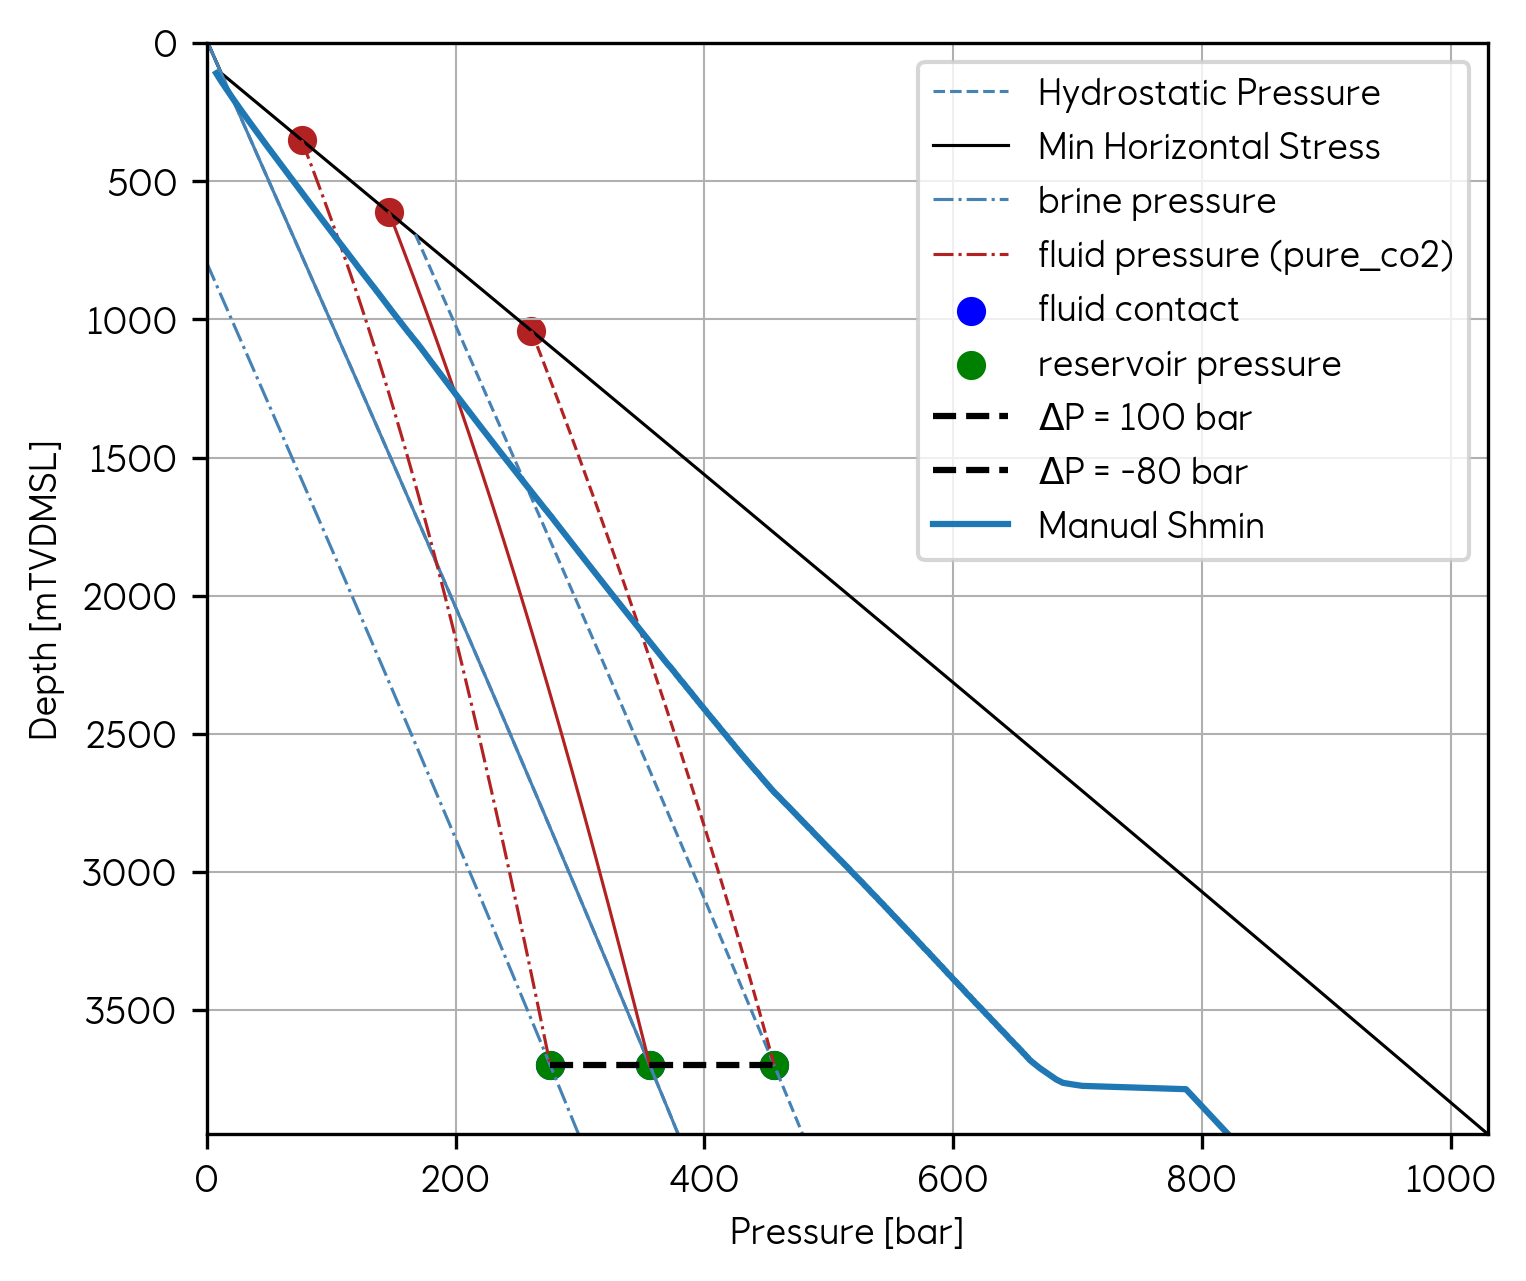

In [100]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True #plot delta p
              )
ax.plot(manual_shmin_p, manual_shmin_z, label='Manual Shmin')
# ax.set_ylim(bottom=my_pressure.well_td_rkb)


ax.legend()
handles, labels = ax.get_legend_handles_labels()  
lgd = dict(zip(labels, handles))
ax.legend(lgd.values(), lgd.keys())


fig.show()

fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: saline1
fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: saline2
fluid_type='pure_co2' self.fluid_type='pure_co2'
Computing pressure profile for scenario: depleted
Lines do not intersect
saline1
saline2
depleted


<Axes: xlabel='Pressure [bar]', ylabel='Depth [mTVDMSL]'>

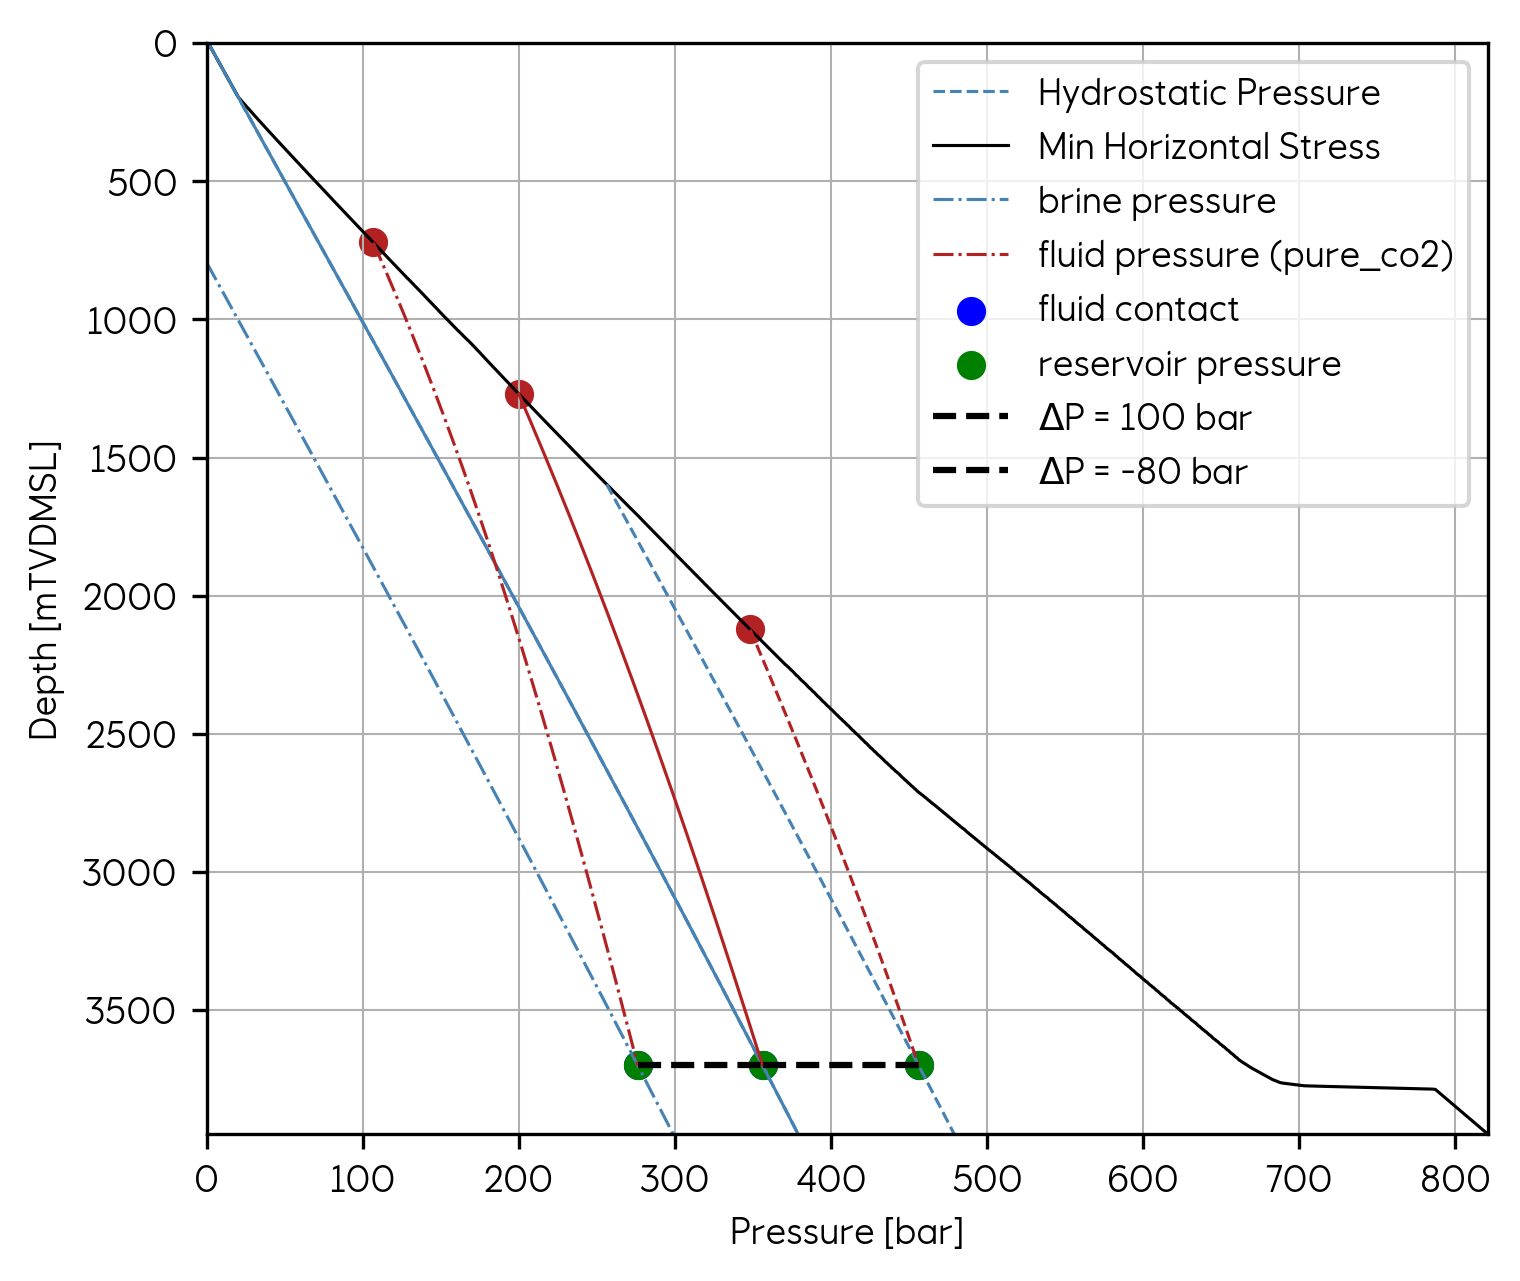

In [101]:
# Assuming depth_list and shmin_list are your lists of depth and Shmin values, respectively.
depth_list = manual_shmin_z  # Example depth values
shmin_list = manual_shmin_p     # Corresponding Shmin values

# Combine the lists into a 2D array where each sublist is a pair of [depth, Shmin].
ip_shmin_data = np.column_stack((depth_list, shmin_list))


my_pressure2 = Pressure(sf_depth_msl=109,
                       well_td_rkb=6648,
                       well_rkb=62.8,
                       sf_temp=4,
                       geo_tgrad=40,
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants',
                       default_hs_scenario=False,
                       ip_shmin_data = ip_shmin_data)


my_pressure2.add_scenario('saline1', fluid_type='pure_co2',  from_resrvr=True,  z_fluid_contact=3700, p_delta= 0)    
my_pressure2.add_scenario('saline2', fluid_type='pure_co2',  from_resrvr=True,  z_fluid_contact=3700, p_delta= 100)  
my_pressure2.add_scenario('depleted', fluid_type='pure_co2', from_resrvr=True,  z_fluid_contact=3700, p_delta= -80)  

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure2, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True #plot delta p
              )




saline1
saline2
depleted
saline1
saline2
depleted


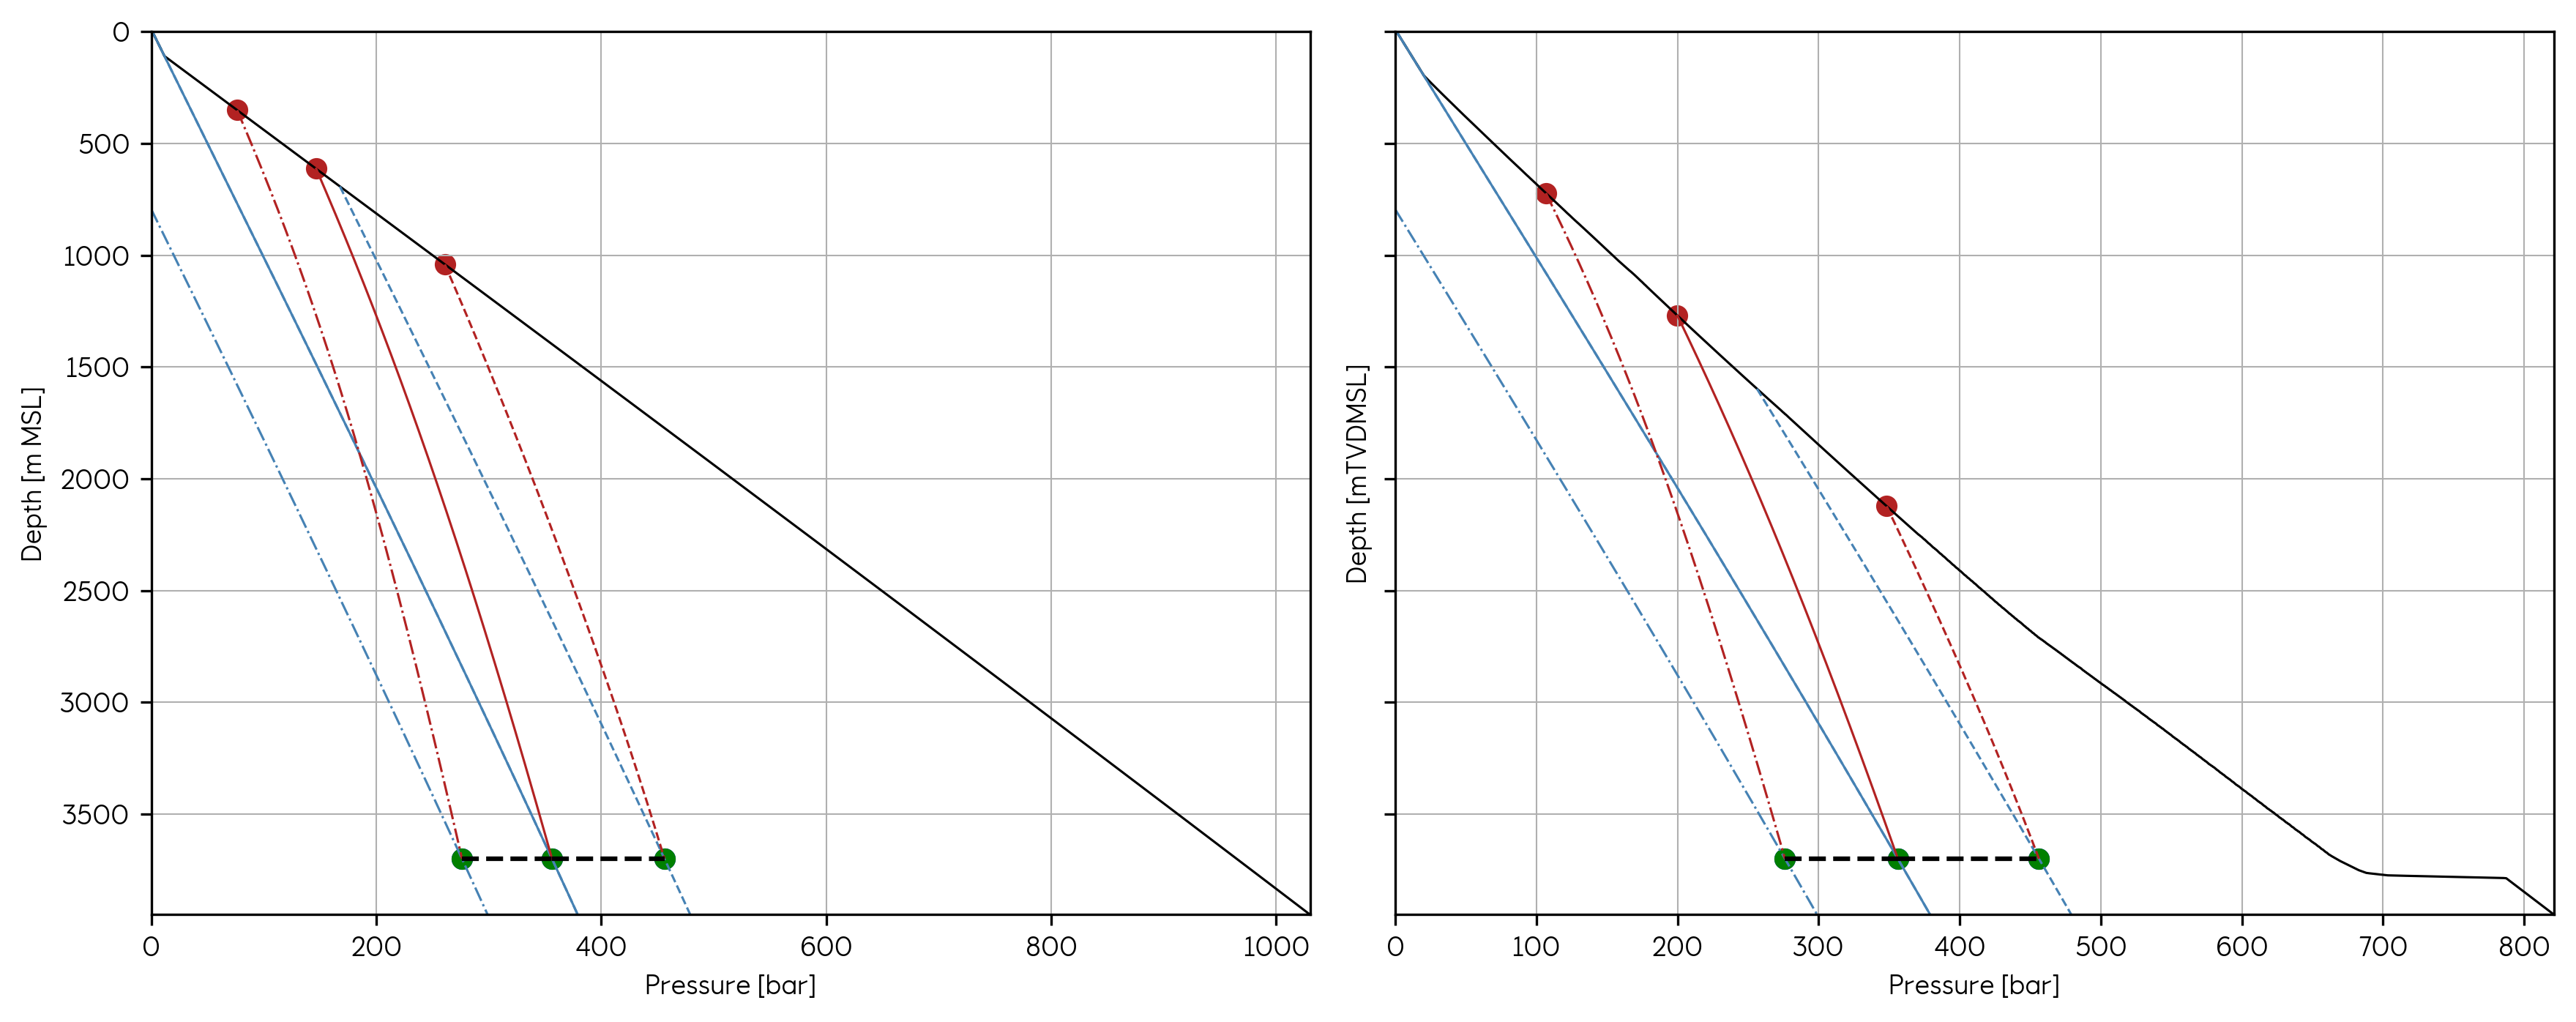

In [102]:
width_cm = 30 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(width, height), sharey=True)

plot_pressure(my_pressure, ax=ax1, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

plot_pressure(my_pressure2, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True, #plot delta p
              legend=False
              )

ax1.set_ylabel('Depth [m MSL]')

fig.tight_layout()

T

To compute the minimum horizontal stress curve in bars or Pascals, you'll need to use the depth (in meters) and specific gravity (SG) values. Here's a step-by-step guide:

### Convert Depth to Pressure:

The pressure at a given depth can be calculated using the formula: $P = \rho \cdot g \cdot h$ where:
- $P$ is the pressure in Pascals (Pa).
- $\rho$ is the density of the fluid (in kg/m³).
- $g$ is the acceleration due to gravity (9.81 m/s²).
- $h$ is the depth in meters (m).

### Calculate Density:

The density ($\rho$) can be derived from the specific gravity (SG) using the formula: $\rho = \text{SG} \cdot \rho_{\text{water}}$ where:
- $\rho_{\text{water}}$ is the density of water (approximately 1000 kg/m³).

### Compute Pressure:

Substitute the values into the pressure formula to get the pressure in Pascals.

### Convert to Bars:

To convert Pascals to bars, use the conversion factor: $1 \text{ bar} = 100,000 \text{ Pa}$

### Here's a sample calculation:

Given:
- Depth ($h$) = 1000 meters
- Specific Gravity (SG) = 1.2

### Steps:

1. Calculate density: $\rho = 1.2 \cdot 1000 \text{ kg/m}^3 = 1200 \text{ kg/m}^3$
2. Calculate pressure in Pascals: $P = 1200 \text{ kg/m}^3 \cdot 9.81 \text{ m/s}^2 \cdot 1000 \text{ m} = 11,772,000 \text{ Pa}$
3. Convert to bars: $P = \frac{11,772,000 \text{ Pa}}{100,000} = 117.72 \text{ bars}$

You can apply these steps to each row in your table to compute the minimum horizontal stress curve in bars or Pascals. If you need further assistance with the calculations or have any other questions, feel free to ask!o compute the minimum horizontal stress curve in bars or Pascals, you'll need to use the depth (in meters) and specific gravity (SG) values. Here's a step-by-step guide:

Convert Depth to Pressure:

The pressure at a given depth can be calculated using the formula: $[ P = \rho \cdot g \cdot h ]$ where:
( $P$ ) is the pressure in Pascals (Pa).

( $\rho$ ) is the density of the fluid (in kg/m³).
( $g$ ) is the acceleration due to gravity (9.81 m/s²).
( h ) is the depth in meters (m).
Calculate Density:

The density (( \rho )) can be derived from the specific gravity (SG) using the formula: [ \rho = \text{SG} \cdot \rho_{\text{water}} ] where:
( \rho_{\text{water}} ) is the density of water (approximately 1000 kg/m³).
Compute Pressure:

Substitute the values into the pressure formula to get the pressure in Pascals.
Convert to Bars:

To convert Pascals to bars, use the conversion factor: [ 1 \text{ bar} = 100,000 \text{ Pa} ]
Here's a sample calculation:

Given:

Depth (( h )) = 1000 meters
Specific Gravity (SG) = 1.2
Steps:

Calculate density: [ \rho = 1.2 \cdot 1000 \text{ kg/m}^3 = 1200 \text{ kg/m}^3 ]
Calculate pressure in Pascals: [ P = 1200 \text{ kg/m}^3 \cdot 9.81 \text{ m/s}^2 \cdot 1000 \text{ m} = 11,772,000 \text{ Pa} ]
Convert to bars: [ P = \frac{11,772,000 \text{ Pa}}{100,000} = 117.72 \text{ bars} ]
You can apply these steps to each row in your table to compute the minimum horizontal stress curve in bars or Pascals. If you need further assistance with the calculations or have any other questions, feel free to ask!